In [1]:
import os
import matplotlib.pyplot as plt
import utils as ul
from scipy.spatial.transform import Rotation
import numpy as np

In [2]:
bagfilename = "trial_1_0628"
csvNameList = [("mavros-imu-data.csv", True, "imu"),
               ("mavros-local_position-pose.csv", True, "local_position"),
               ("mavros-local_position-velocity_local.csv", True, "local_velocity"),
               ("state_estimator-local_position-odom-UAV0.csv", True, "state_estimator"),
               ("mocap-UAV0.csv", True, "mocap"),
               ("tracking_controller-output_data.csv", True, "output"),
               ("tracking_controller-target.csv", True, "target")]
dir = os.getcwd() + "/data/" + bagfilename + "/"


In [3]:
loggings = dict()
for filename in csvNameList:
    loggings[filename[2]] = ul.ProcessRosbagDataFromCSV(dir + filename[0], calcTime=filename[1])
    
# set start and end data points
startIdx = 0
endIdx = 8700

In [4]:
# get body angle

n = len(loggings["imu"]["orientation.x"])

roll = np.zeros((n,))
pitch = np.zeros((n,))
yaw = np.zeros((n,))

for i in range(n):
    r = Rotation.from_quat([loggings["imu"]["orientation.x"][i],
                            loggings["imu"]["orientation.y"][i],
                            loggings["imu"]["orientation.z"][i],
                            loggings["imu"]["orientation.w"][i]])
    euler = r.as_euler('xyz', degrees=True)
    roll[i] = euler[0]
    pitch[i] = euler[1]
    yaw[i] = euler[2]

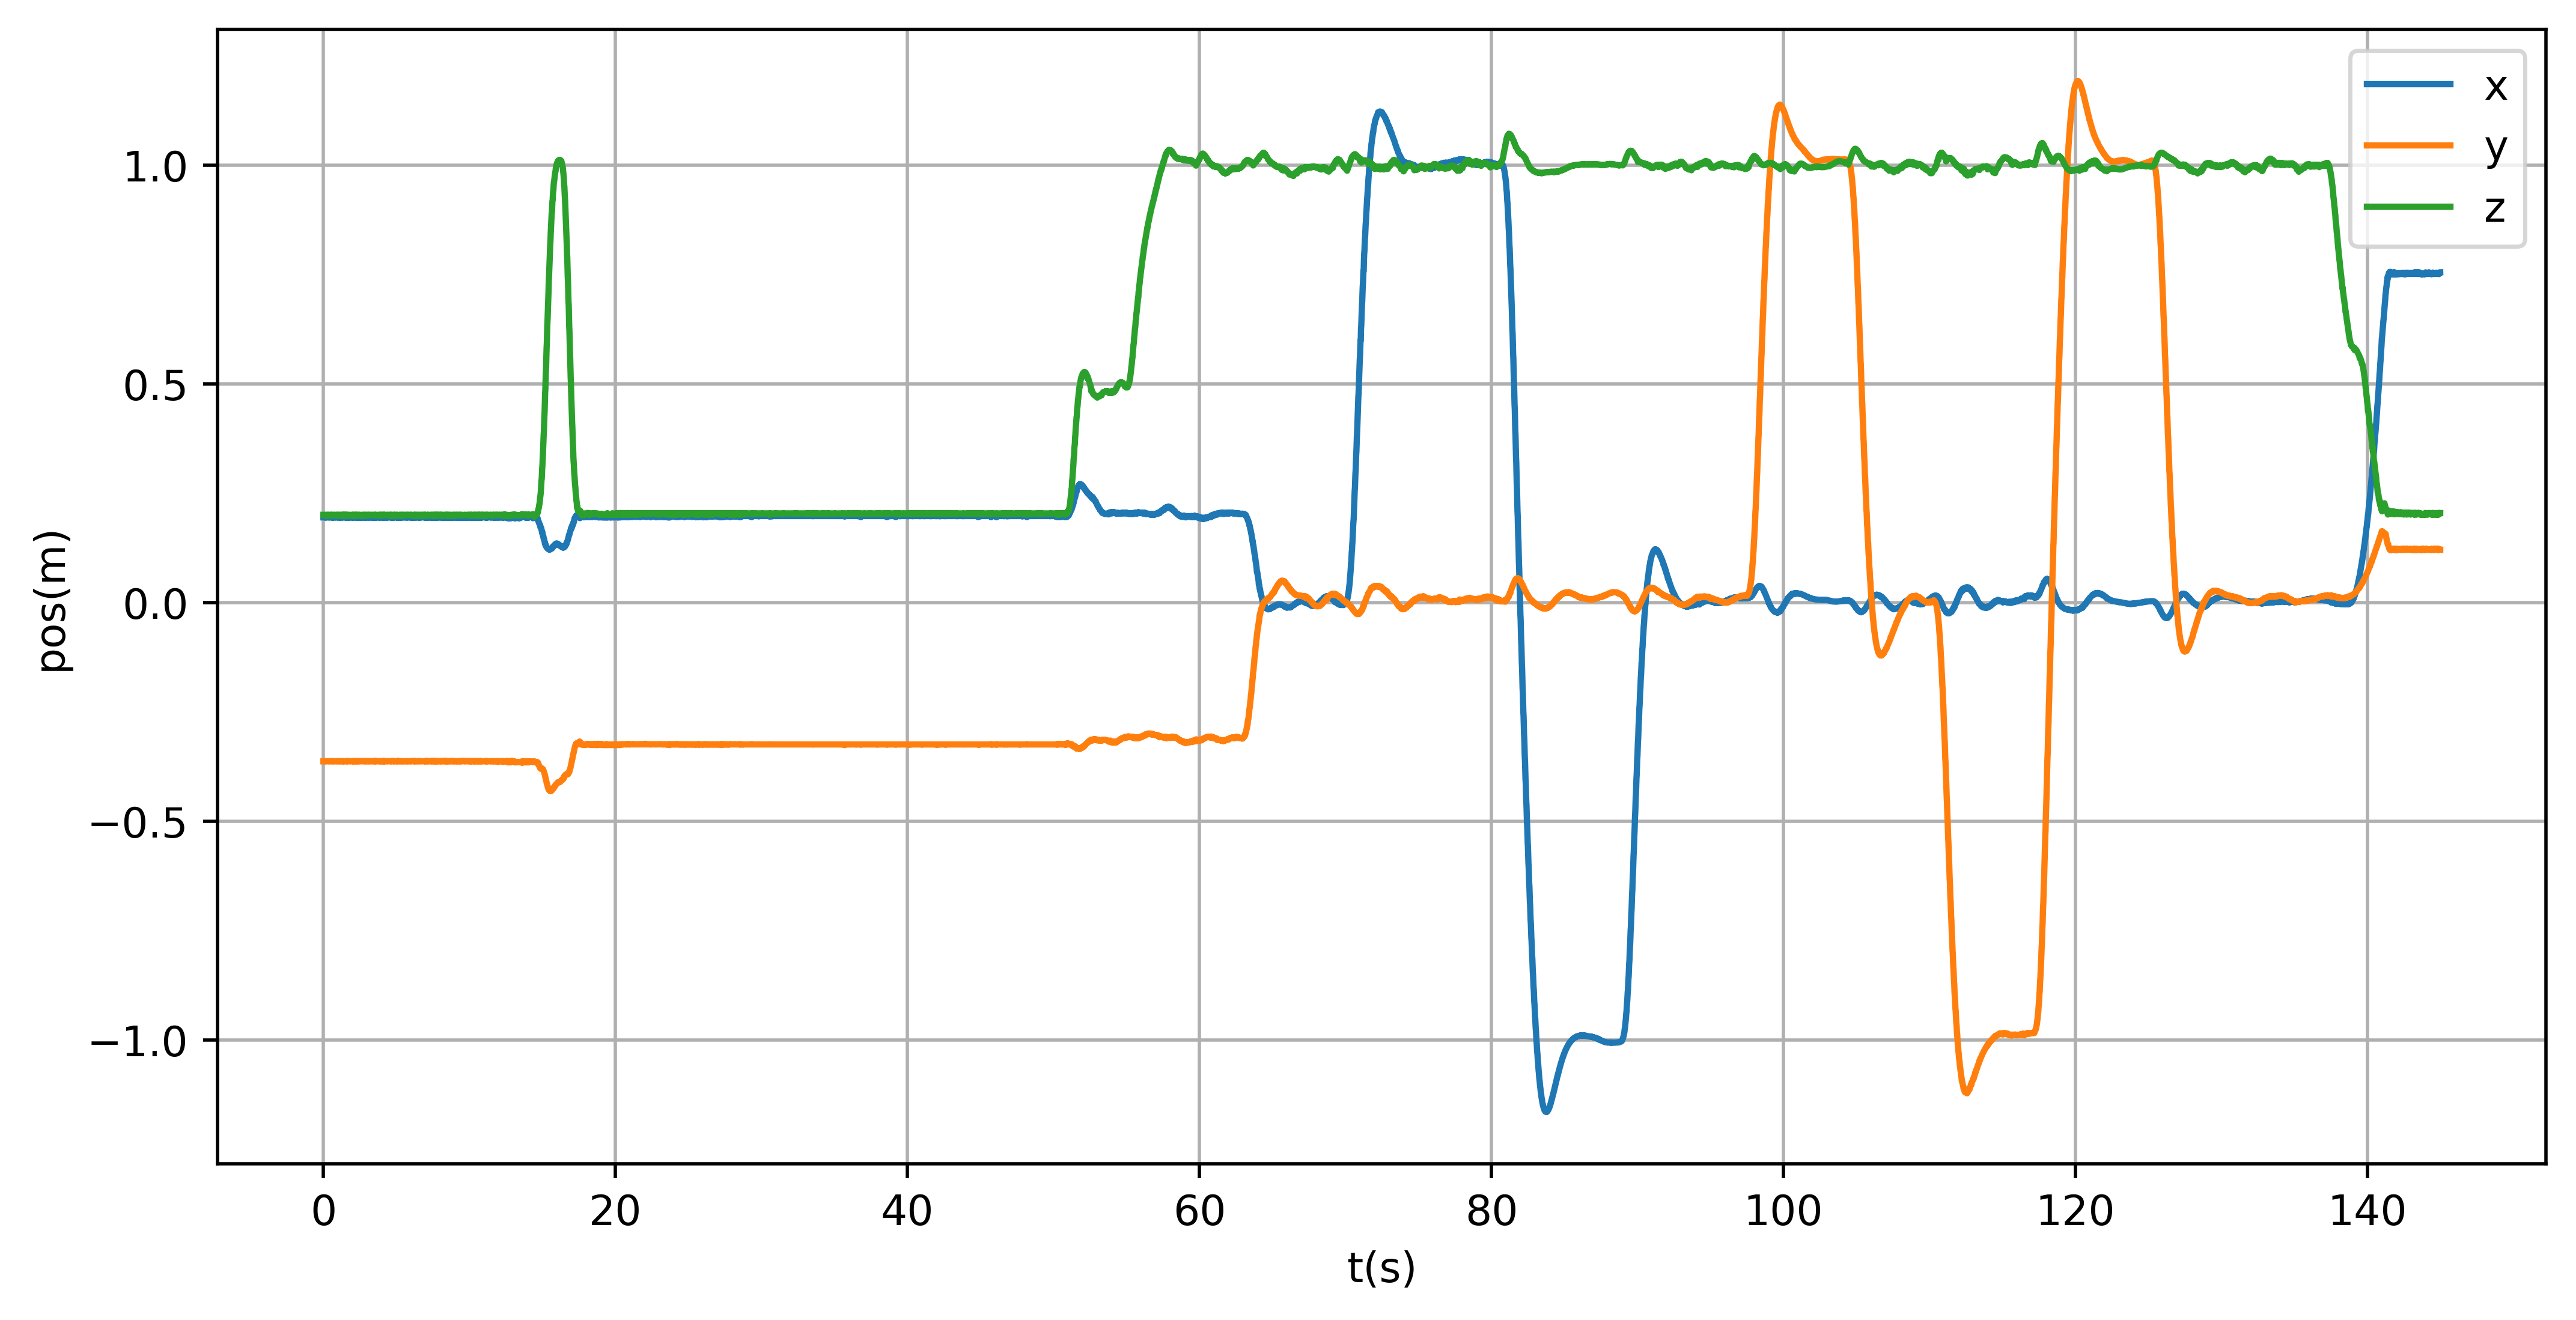

In [5]:
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.x'][startIdx:endIdx])
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.y'][startIdx:endIdx])
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.z'][startIdx:endIdx])
plt.legend(['x', 'y', 'z']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

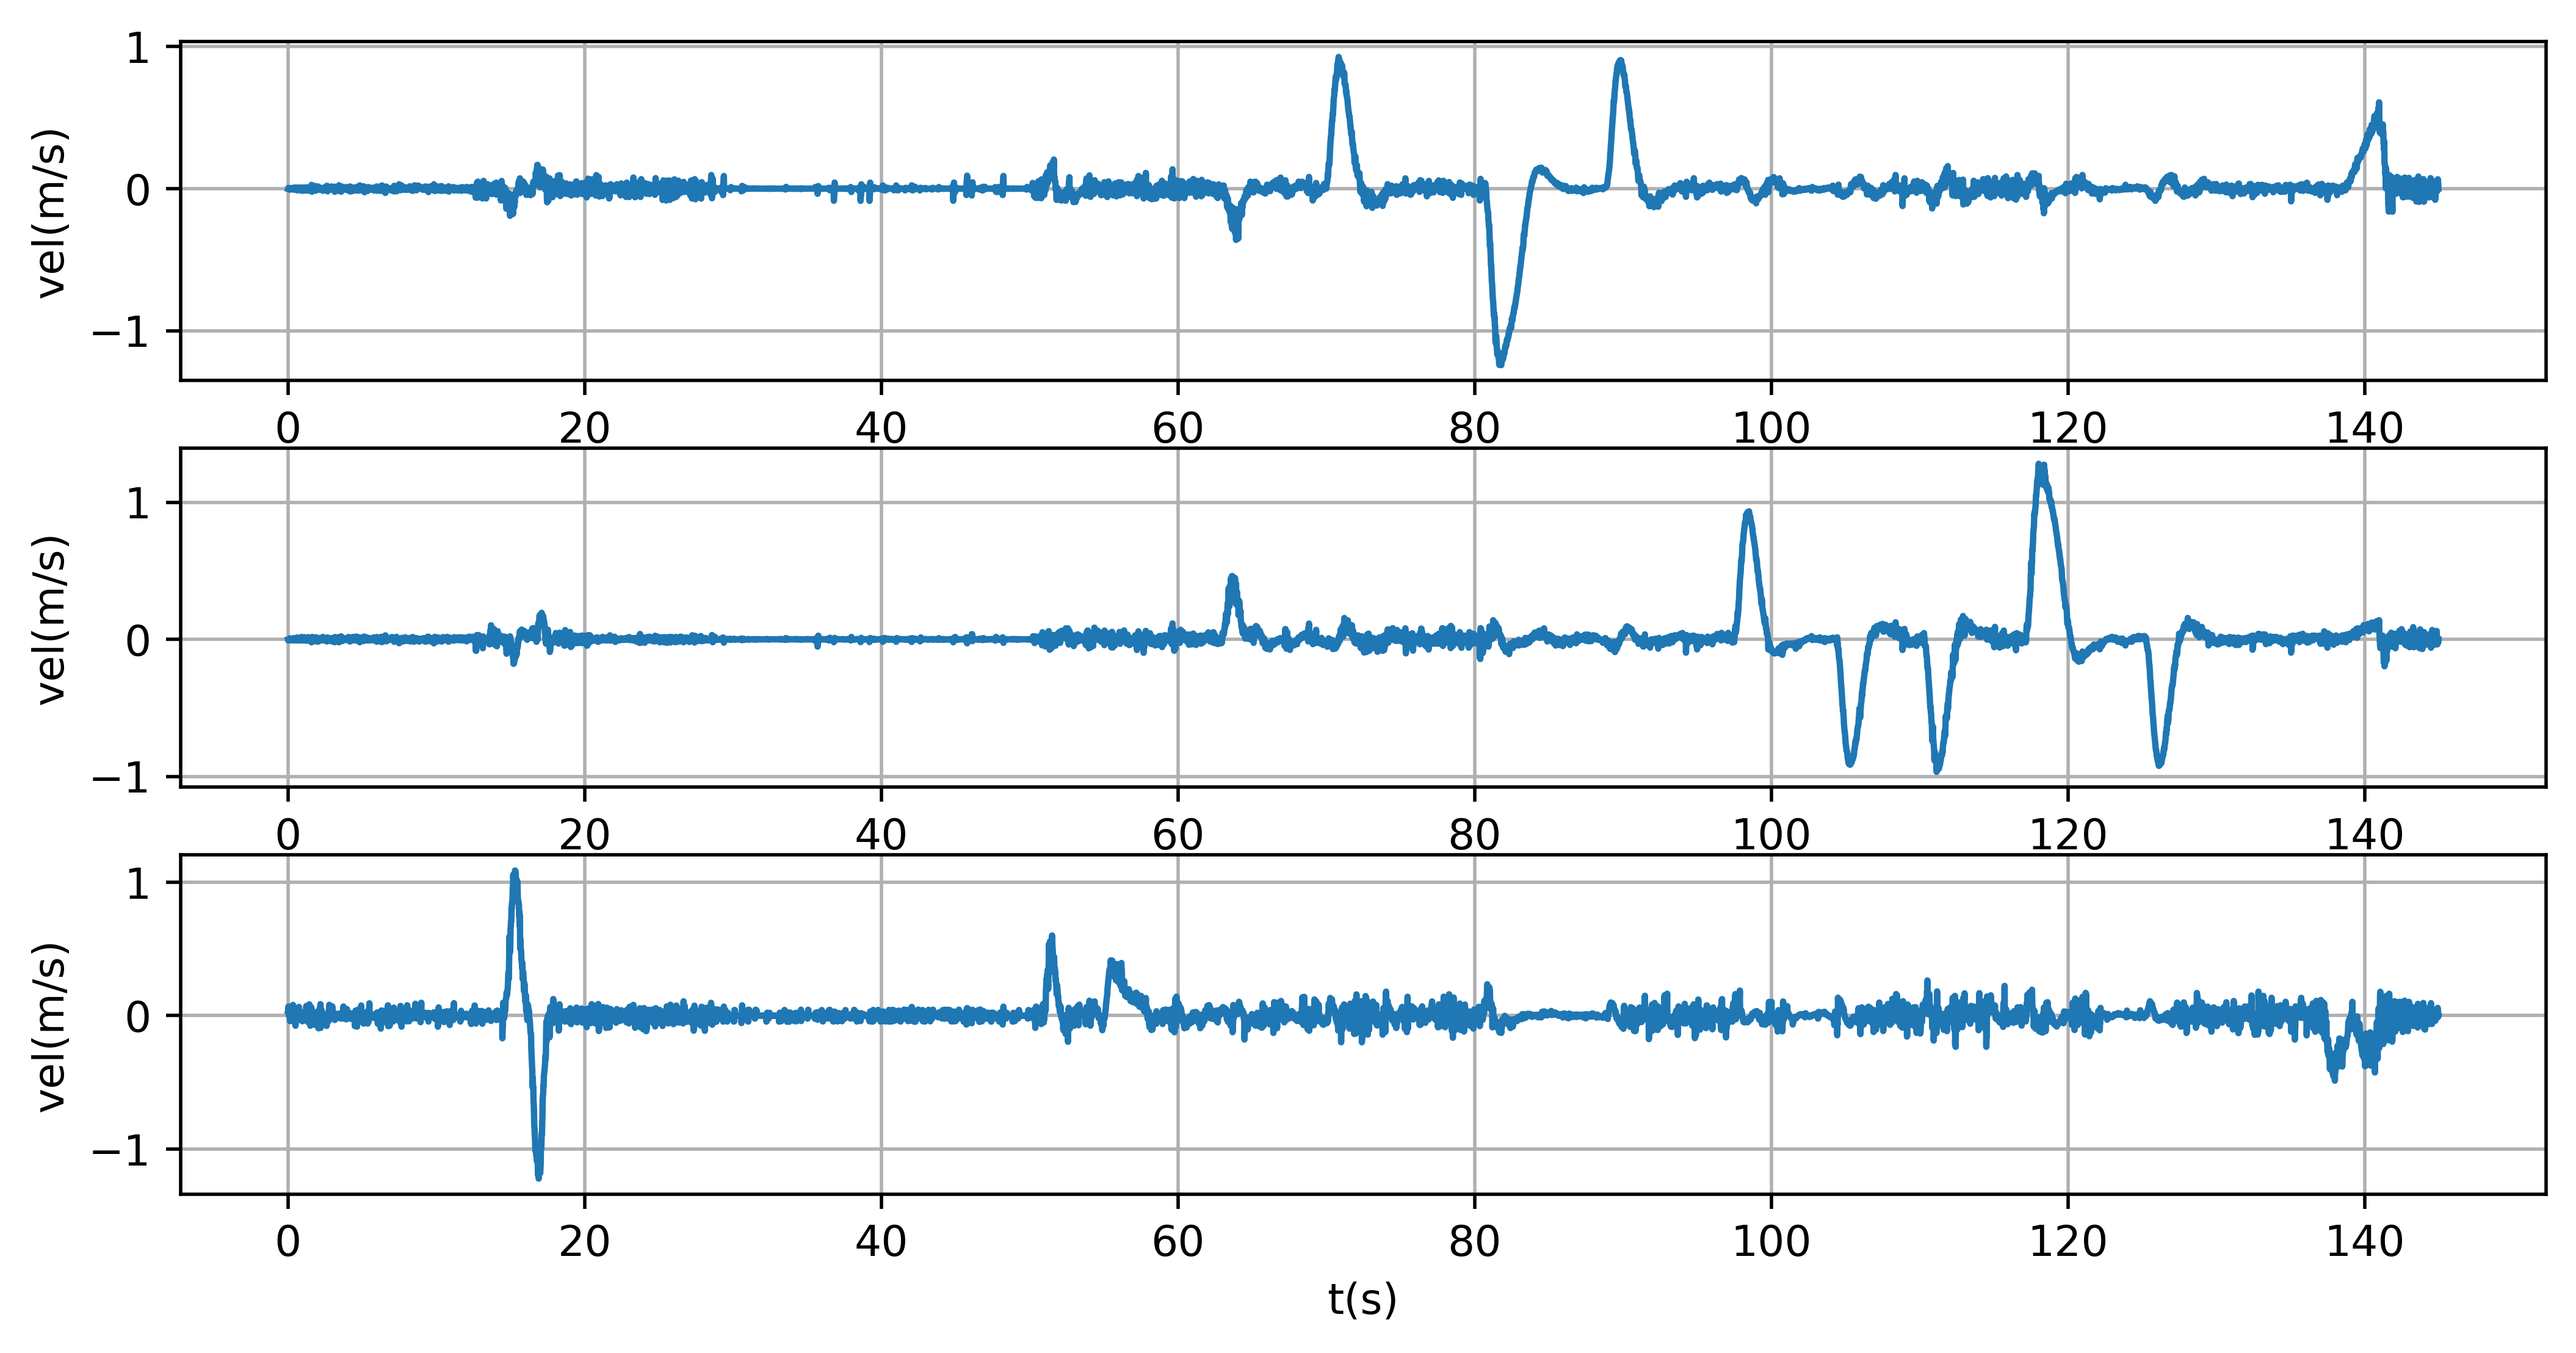

In [6]:
plt.figure(figsize=(10,5), dpi= 500)
plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


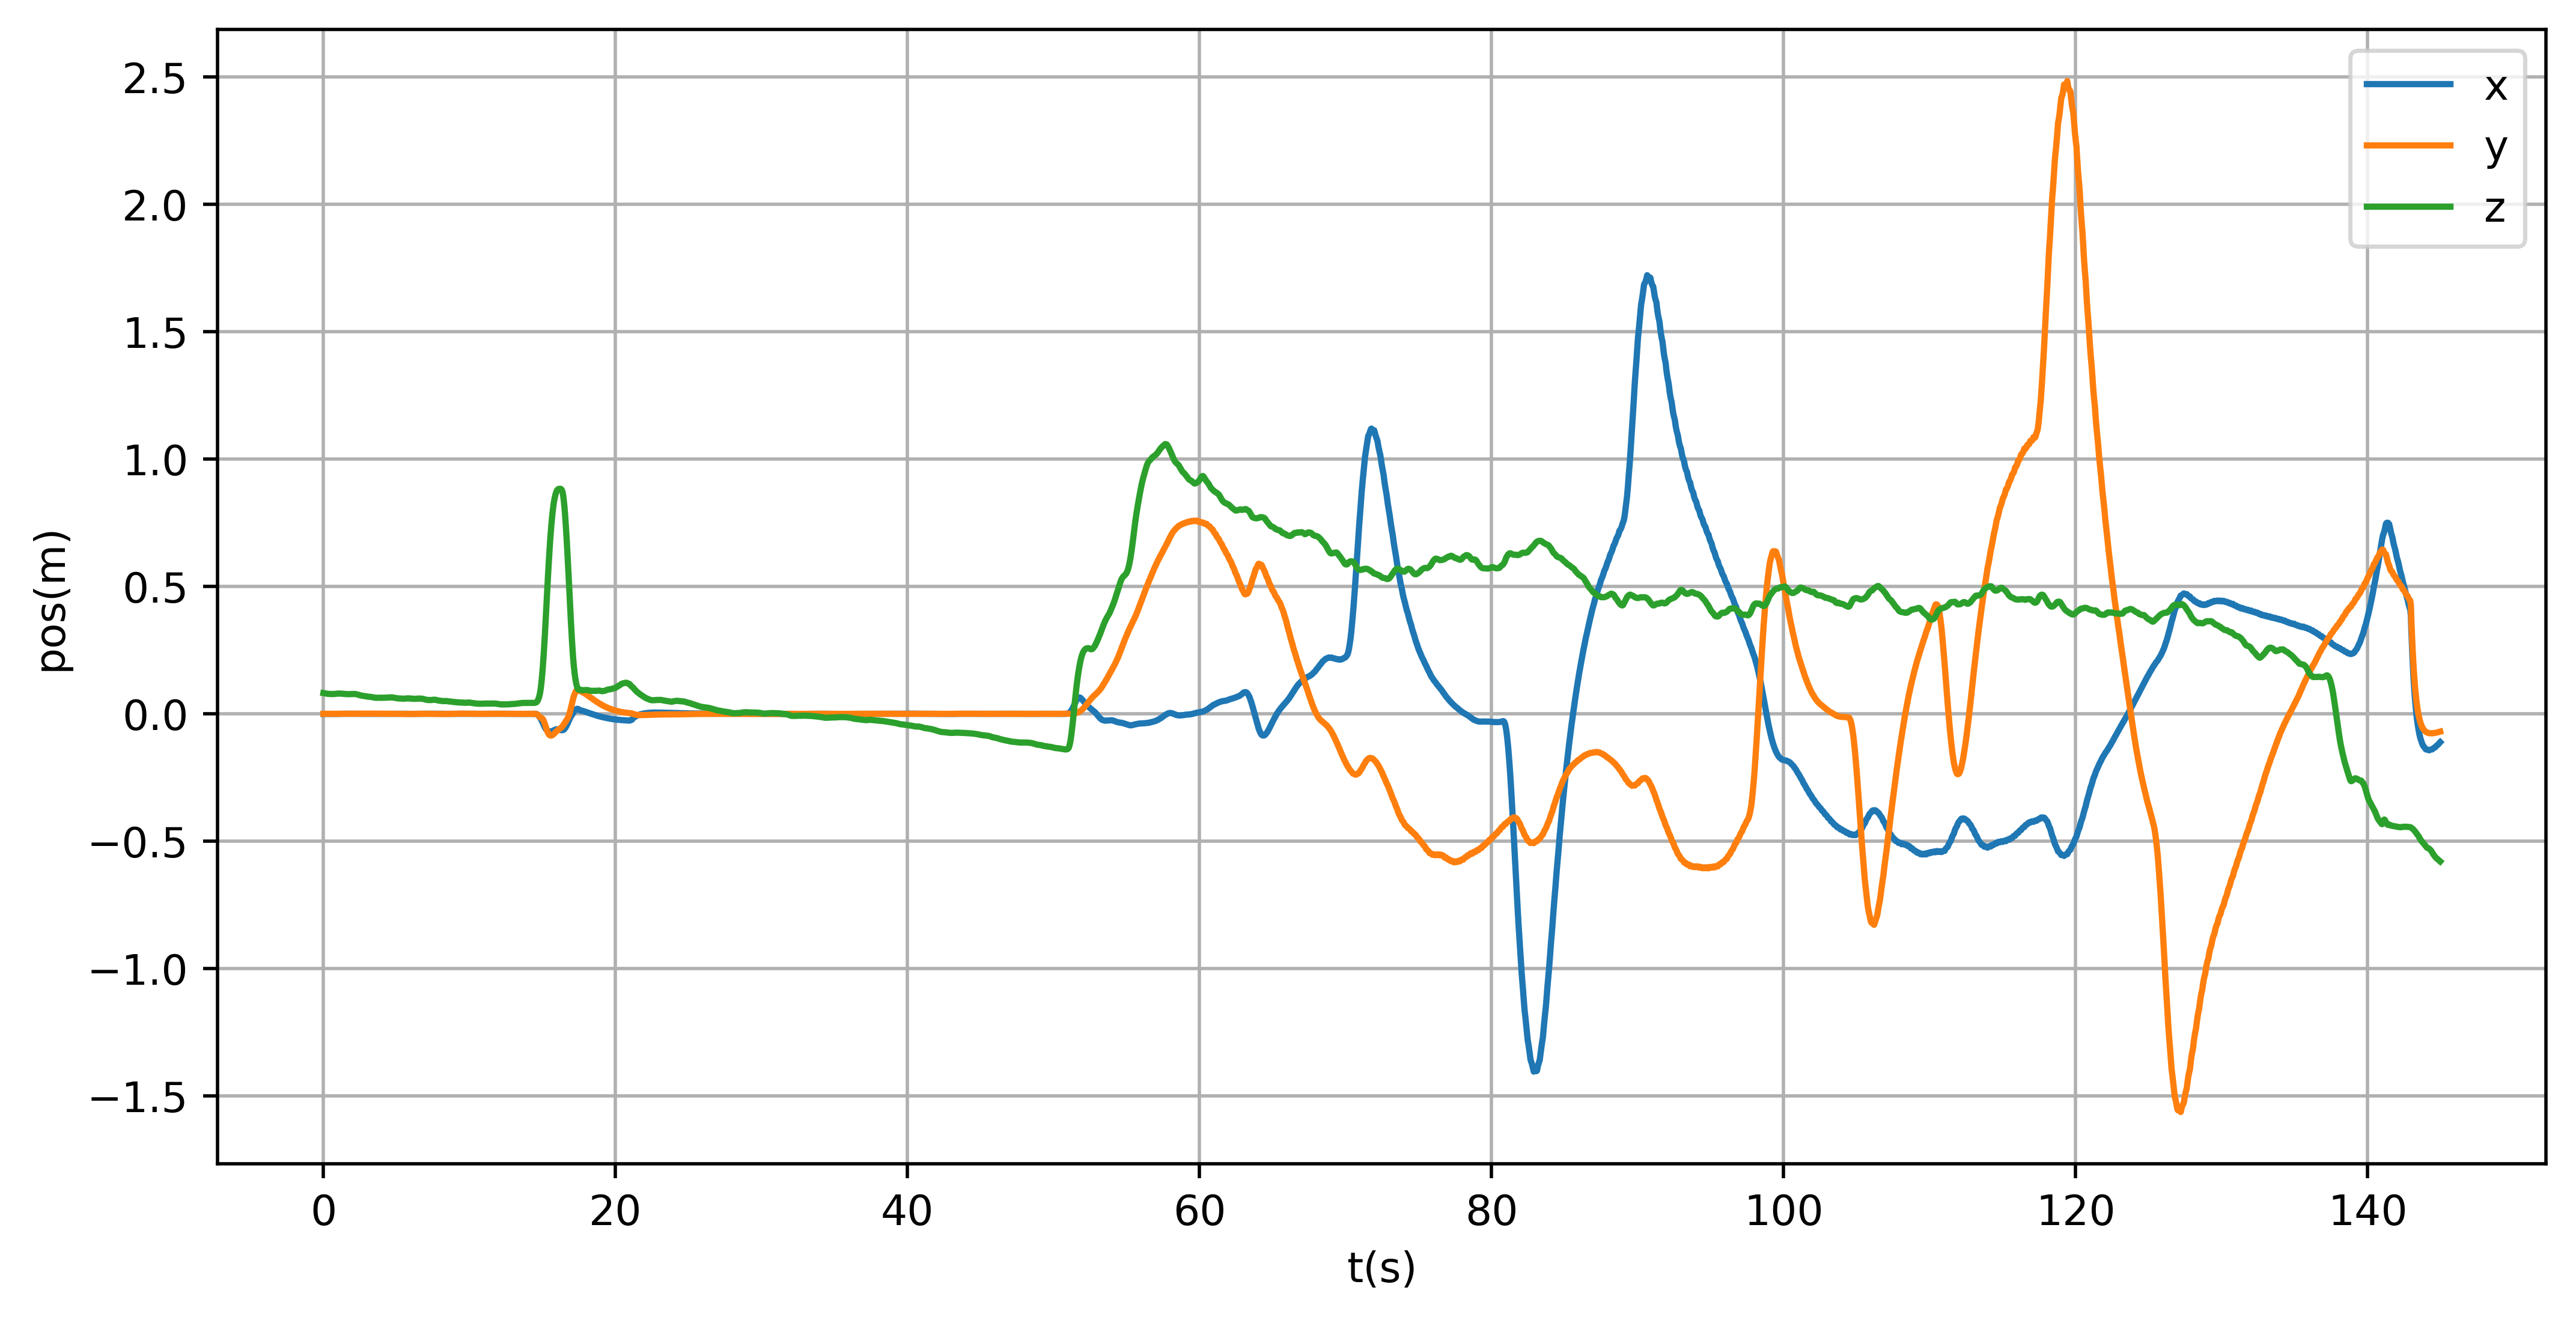

In [7]:
startIdx = 0
endIdx = 3900
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.x'][startIdx:endIdx])
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.y'][startIdx:endIdx])
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.z'][startIdx:endIdx])
plt.legend(['x', 'y', 'z']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

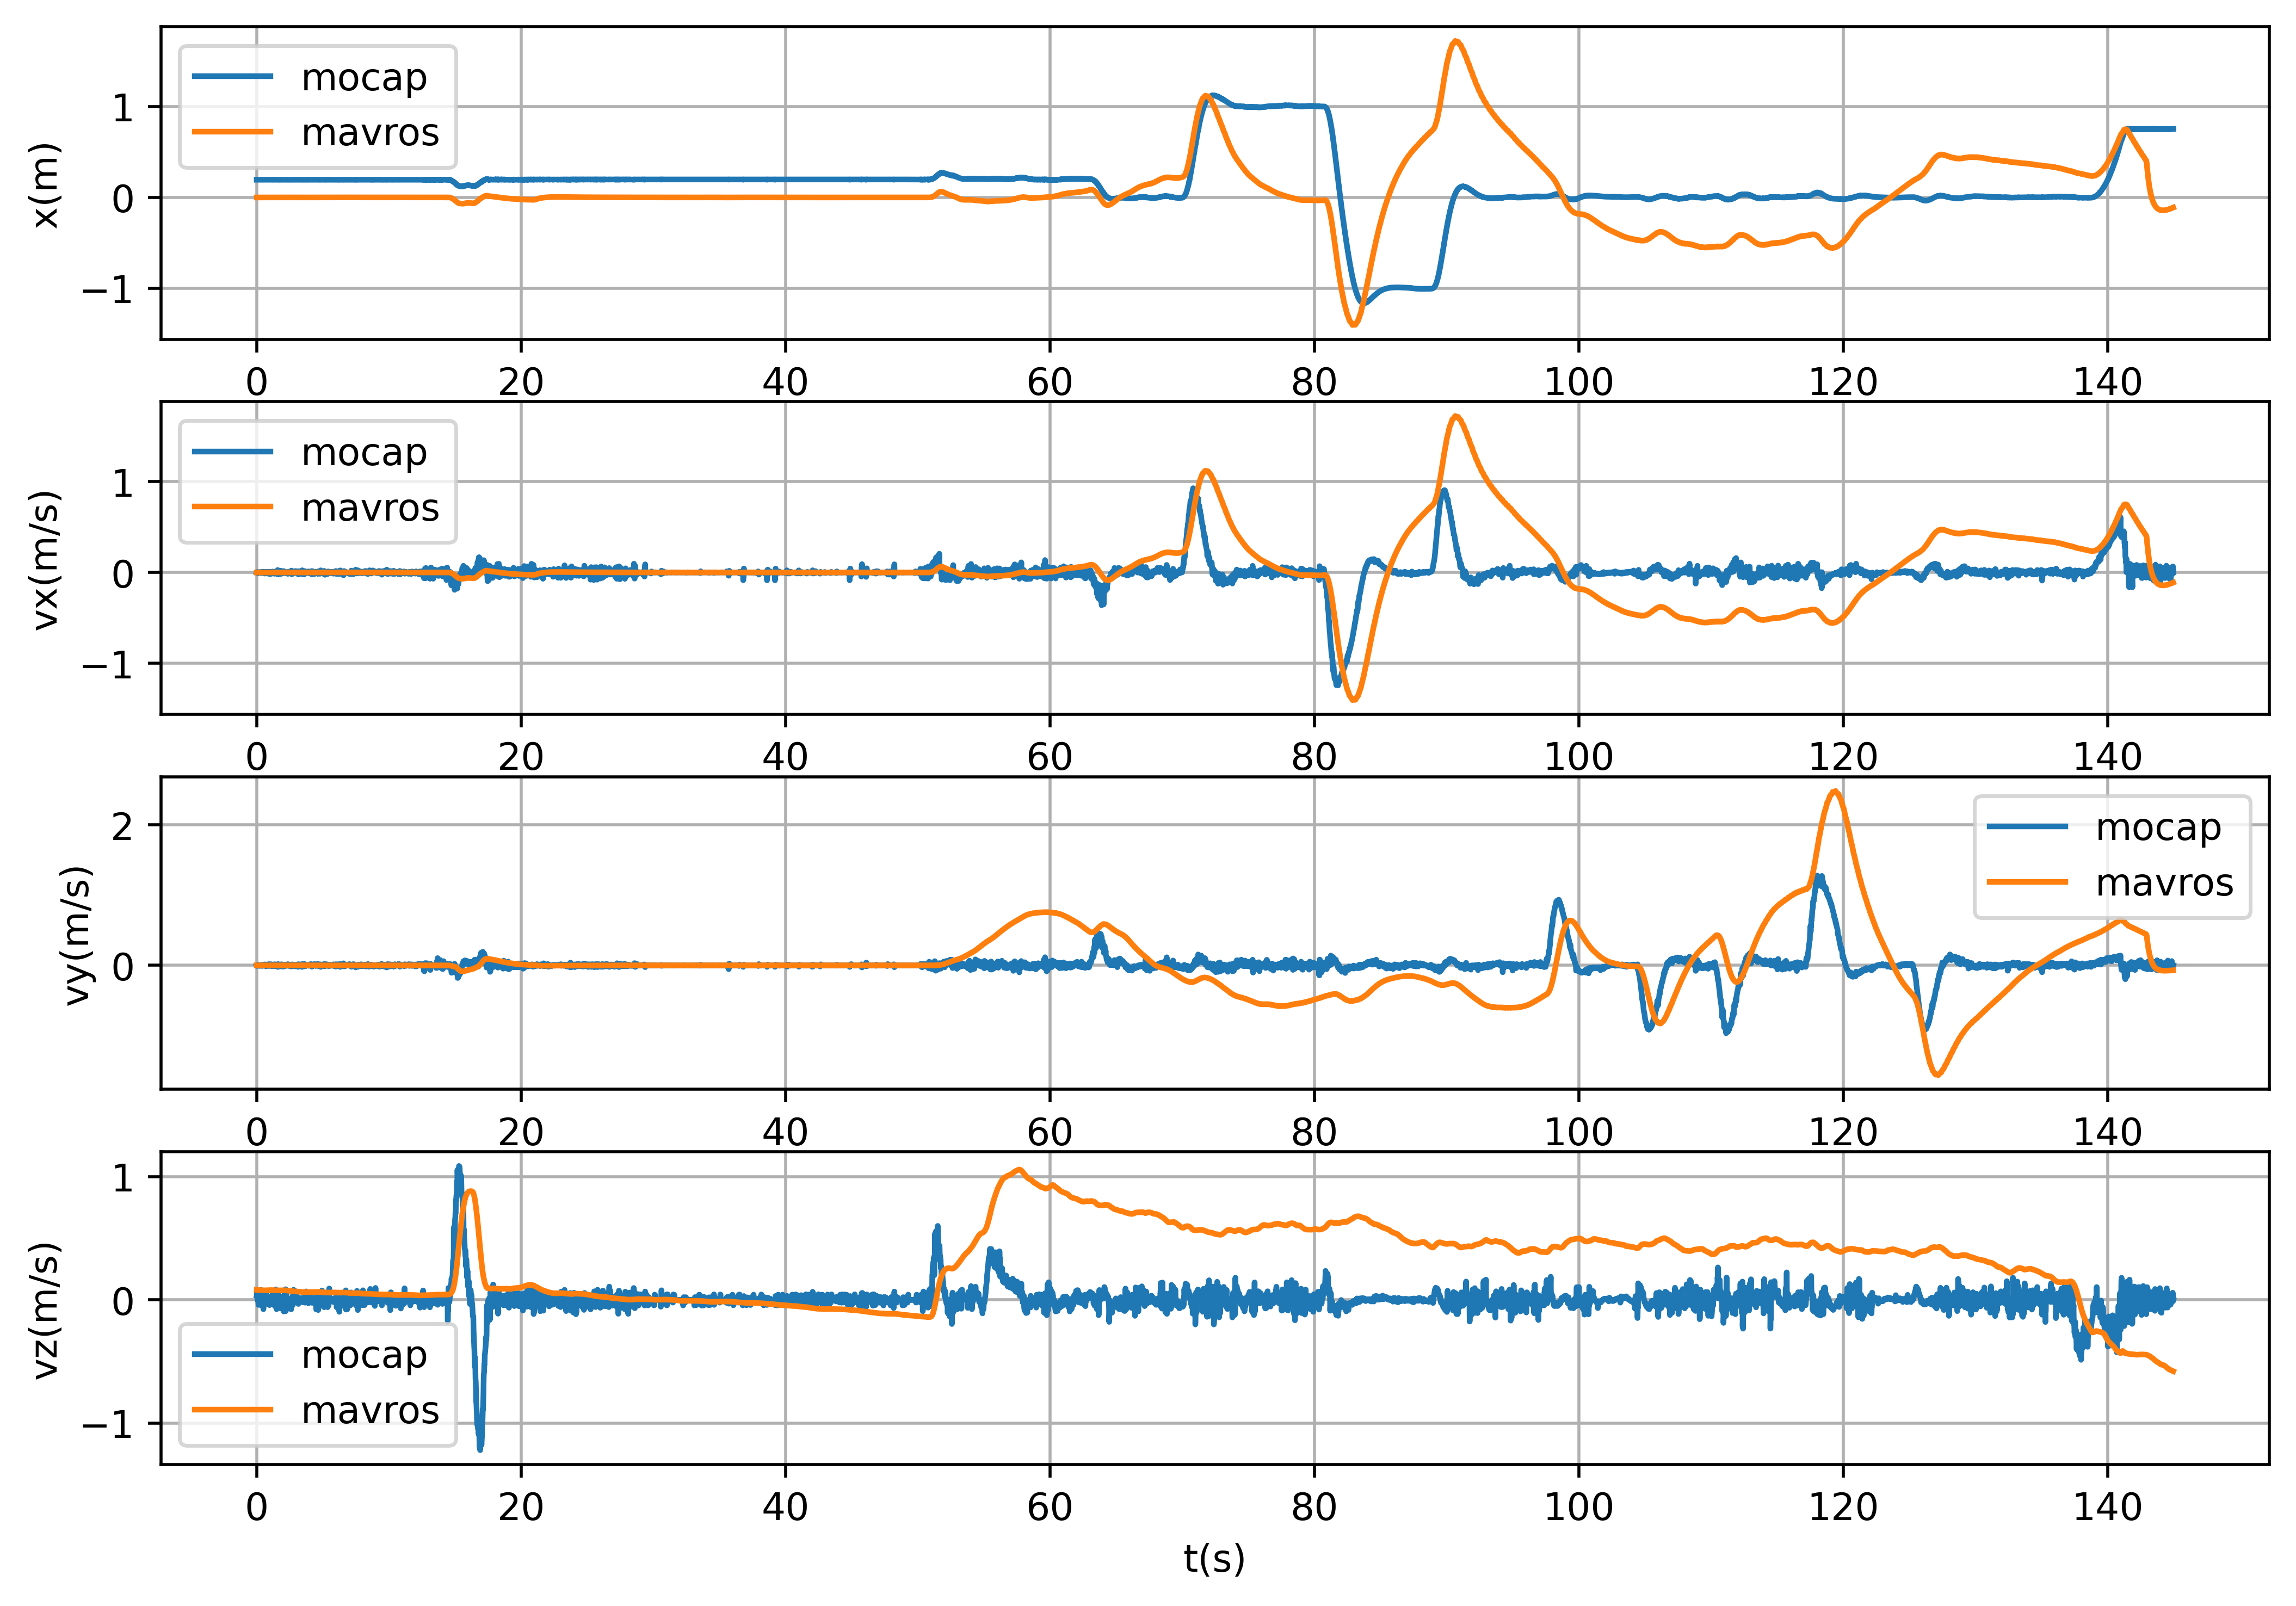

In [8]:
plt.figure(figsize=(10,7), dpi= 500)
plt.subplot(411)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.x'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.x'][startIdx:endIdx])
plt.legend(['mocap','mavros']) 
plt.ylabel('x(m)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(412)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.x'][startIdx:endIdx])
plt.legend(['mocap','mavros']) 
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(413)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.y'][startIdx:endIdx])
plt.legend(['mocap','mavros']) 
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


plt.subplot(414)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_position"]["processed_time"][startIdx:endIdx], loggings["local_position"]['pose.position.z'][startIdx:endIdx])
plt.legend(['mocap','mavros']) 
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

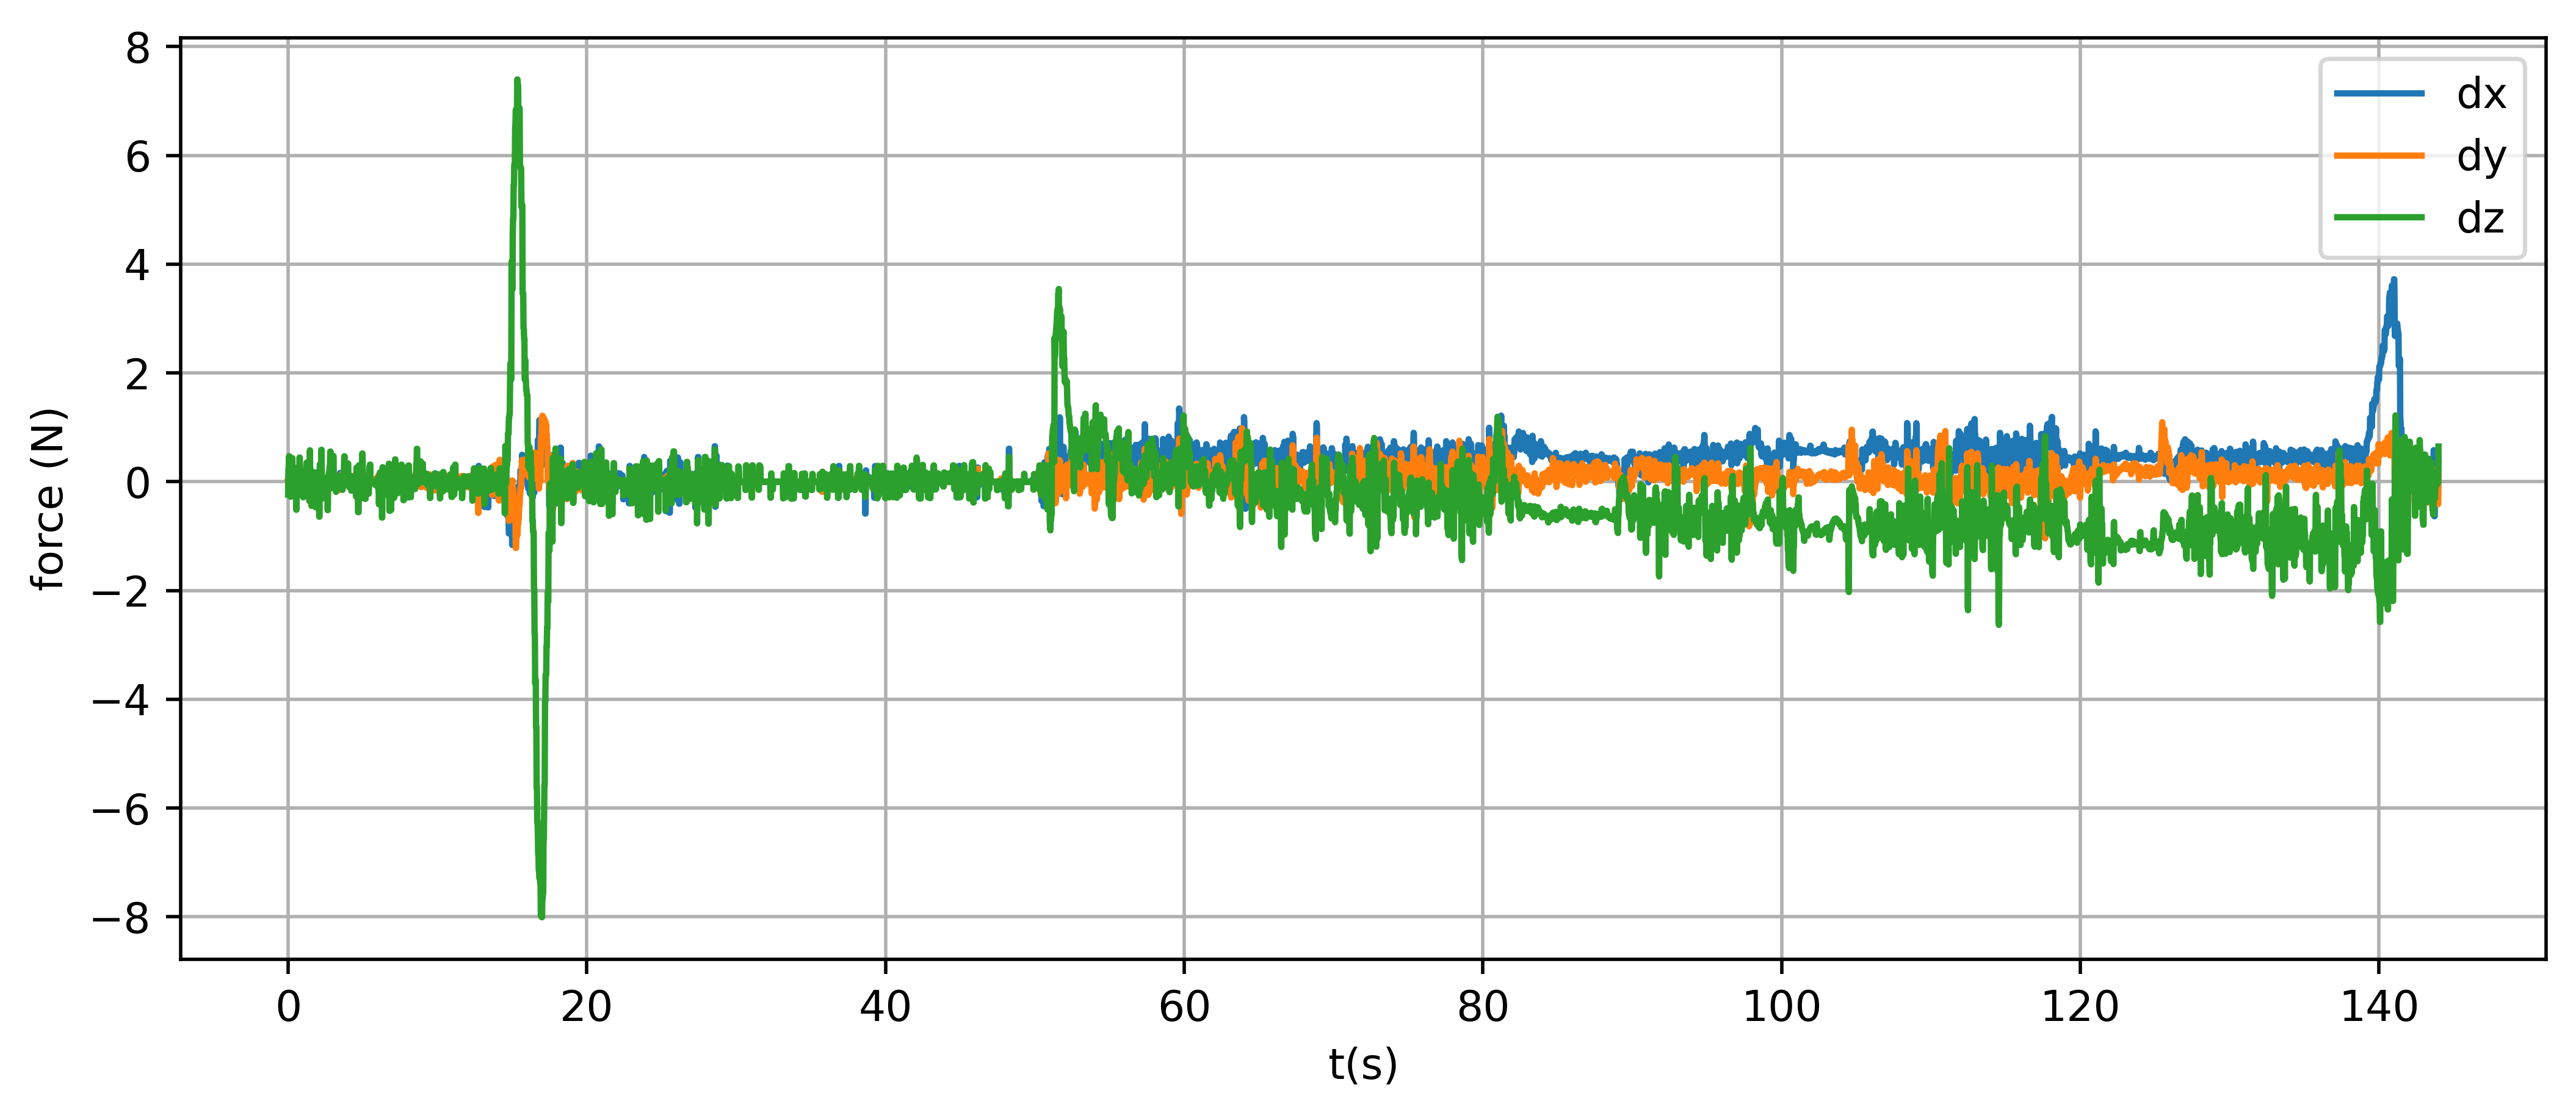

In [9]:
plt.figure(figsize=(10,4), dpi= 500)
startIdx = 0
endIdx = 7200
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.x'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.y'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.z'][startIdx:endIdx])
plt.legend(['dx', 'dy', 'dz']) 
plt.ylabel('force (N)')
plt.xlabel('t(s)')
plt.grid(True)

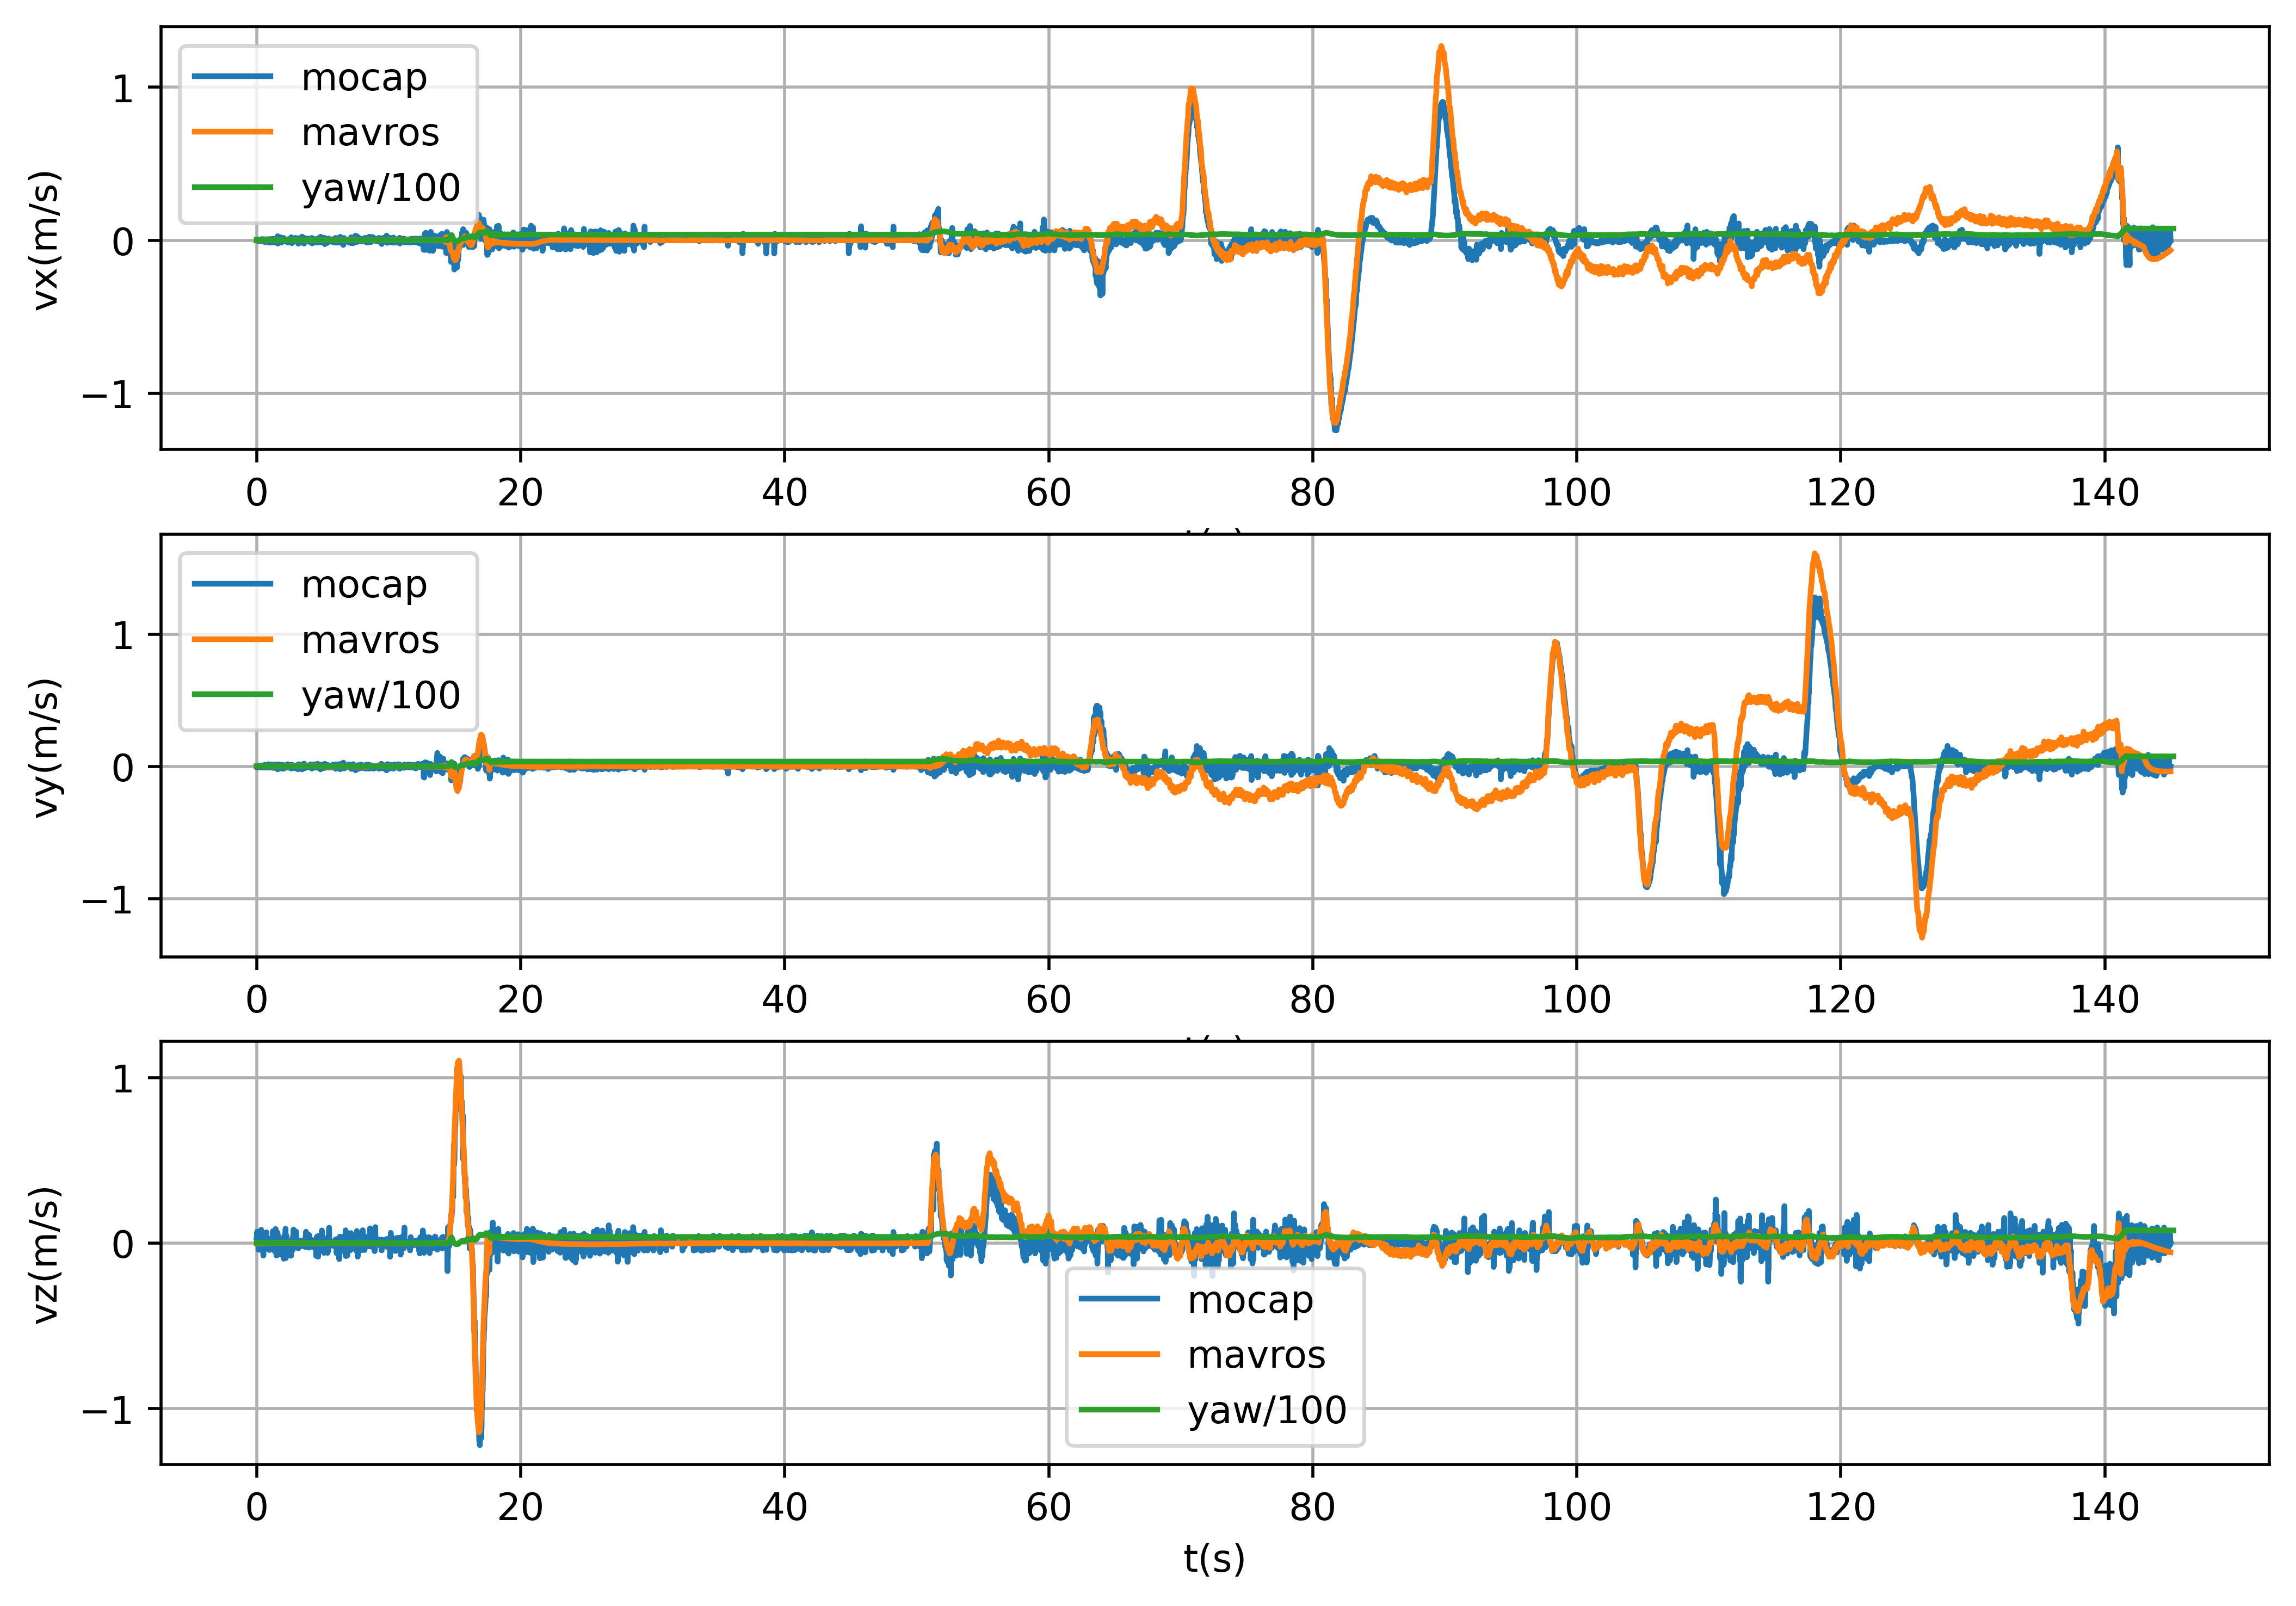

In [10]:
plt.figure(figsize=(10,7), dpi= 500)
plt.subplot(311)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_velocity"]["processed_time"][startIdx:endIdx], loggings["local_velocity"]['twist.linear.x'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)

plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_velocity"]["processed_time"][startIdx:endIdx], loggings["local_velocity"]['twist.linear.y'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)

plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
startIdx = 0
endIdx = 8700
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
startIdx = 0
endIdx = 3900
plt.plot(loggings["local_velocity"]["processed_time"][startIdx:endIdx], loggings["local_velocity"]['twist.linear.z'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)

plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

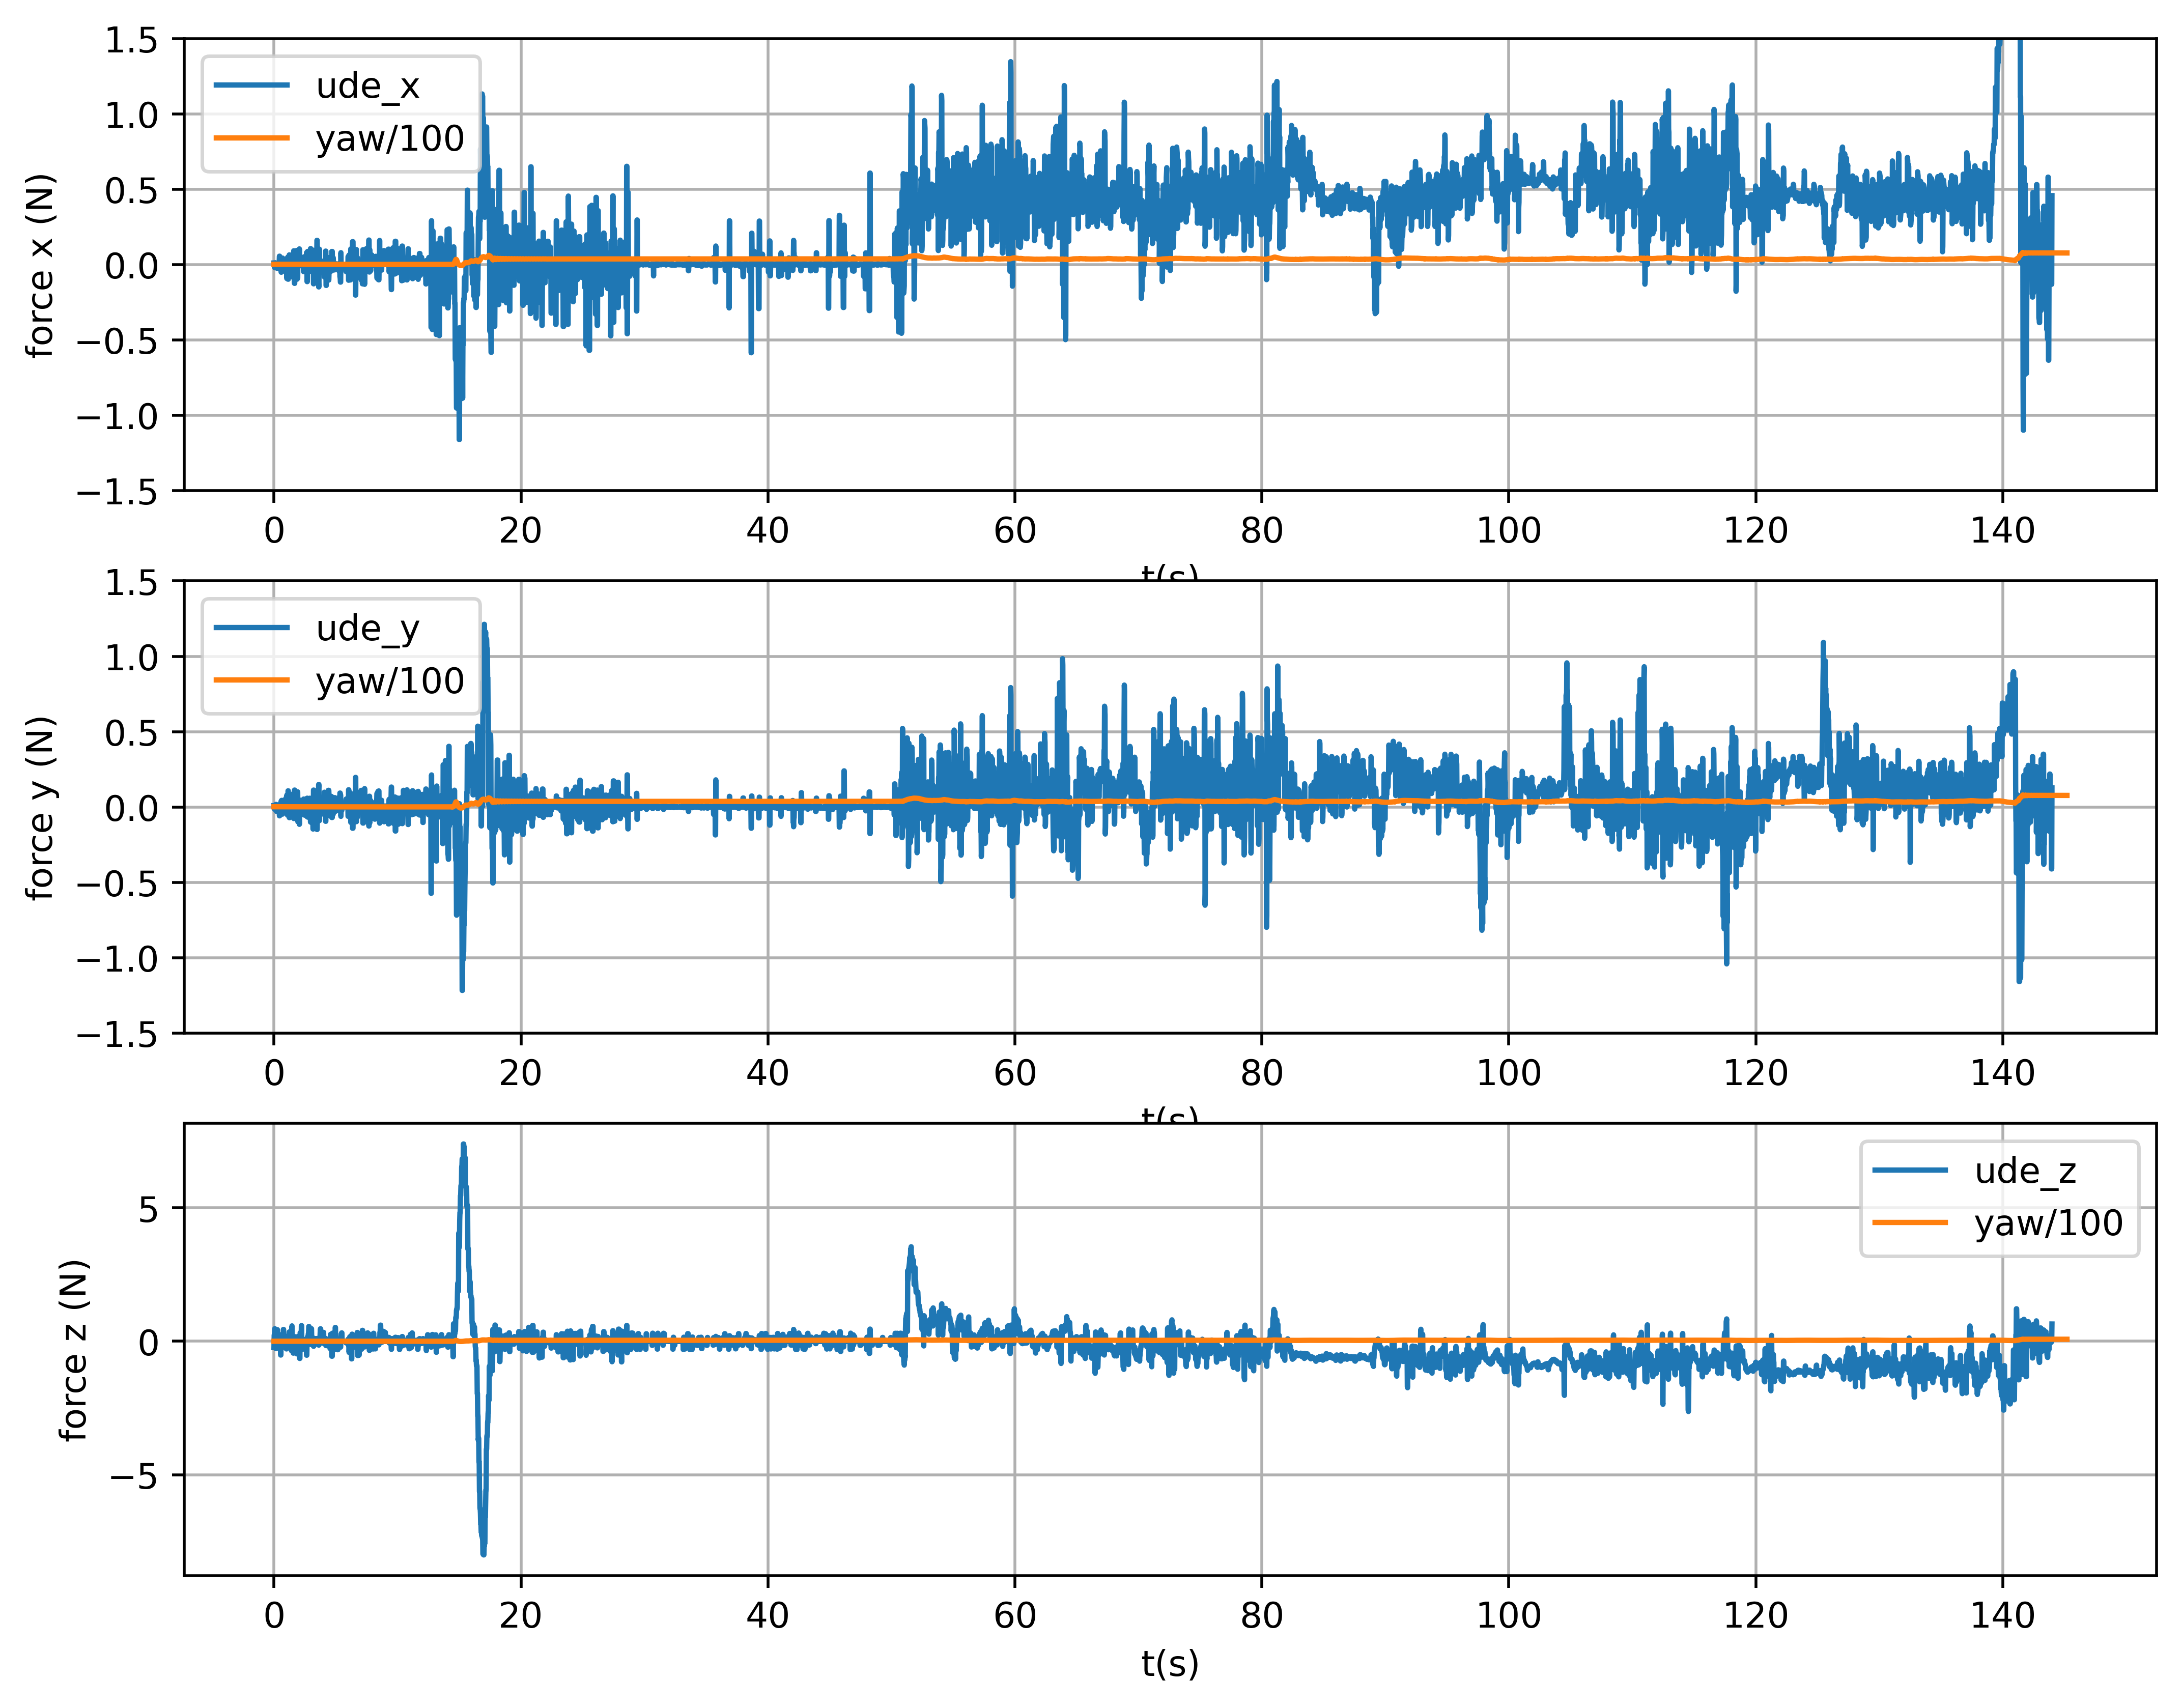

In [14]:
plt.figure(figsize=(10,8), dpi= 500)
startIdx = 0
endIdx = 7200
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.x'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_x','yaw/100']) 
plt.ylabel('force x (N)')
plt.xlabel('t(s)')
plt.axis([None, None, -1.5, 1.5])

plt.grid(True)

plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.y'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_y','yaw/100']) 
plt.ylabel('force y (N)')
plt.xlabel('t(s)')
plt.axis([None, None, -1.5, 1.5])
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.disturbance_estimate.z'][startIdx:endIdx])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_z','yaw/100']) 
plt.ylabel('force z (N)')
plt.xlabel('t(s)')
plt.grid(True)

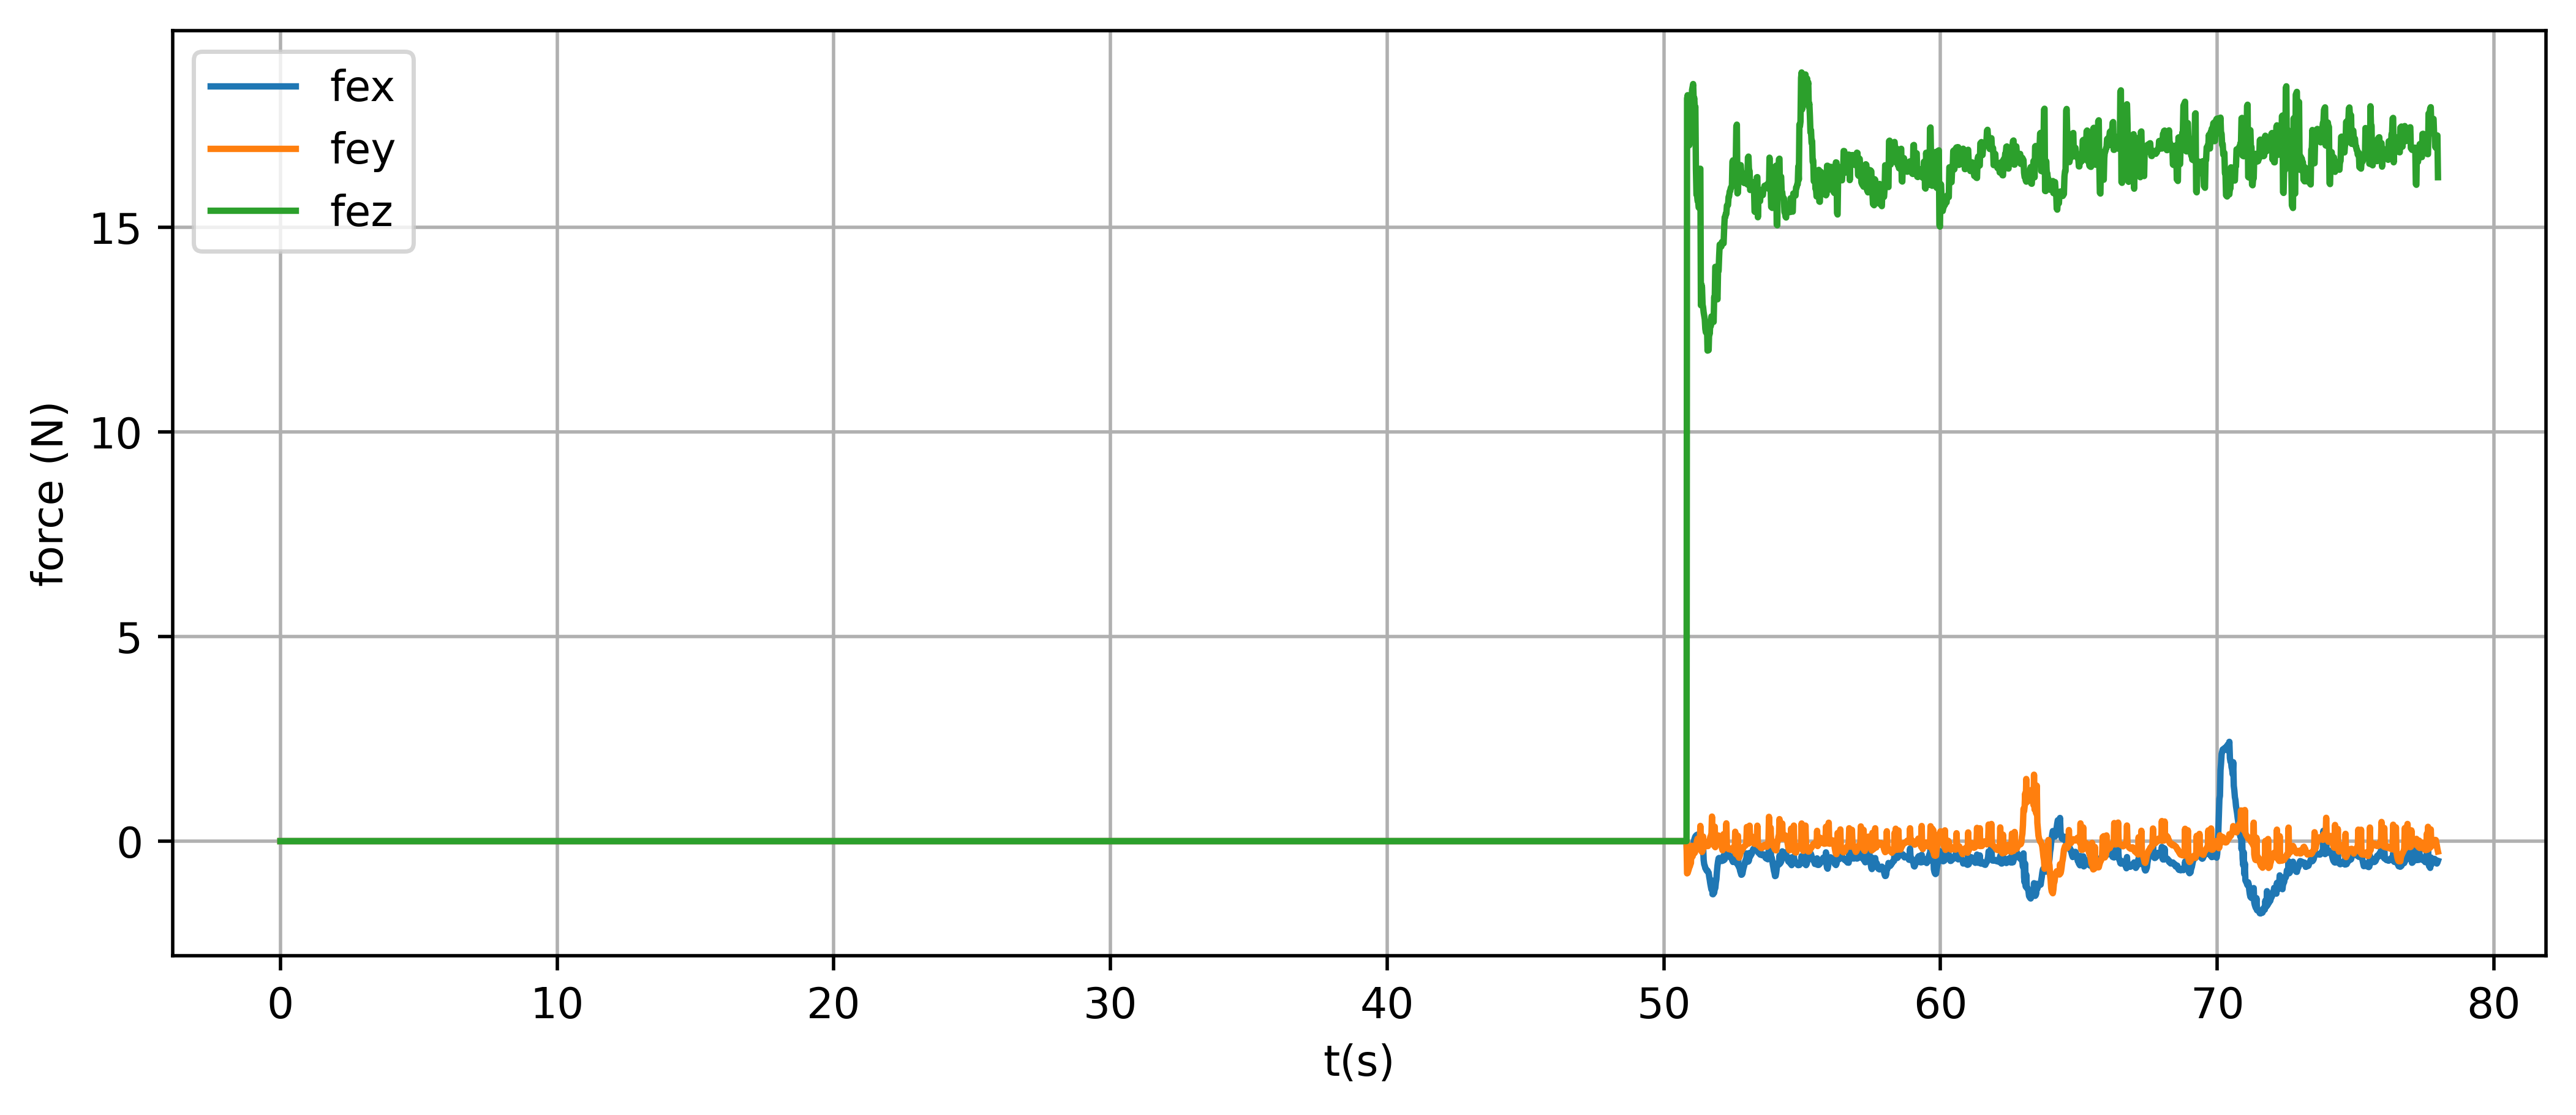

In [11]:
plt.figure(figsize=(10,4), dpi= 500)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.x'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.y'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['ude_state.expected_thrust.z'][startIdx:endIdx])
plt.legend(['fex', 'fey', 'fez']) 
plt.ylabel('force (N)')
plt.xlabel('t(s)')
plt.grid(True)

Text(0.5, 0, 't(s)')

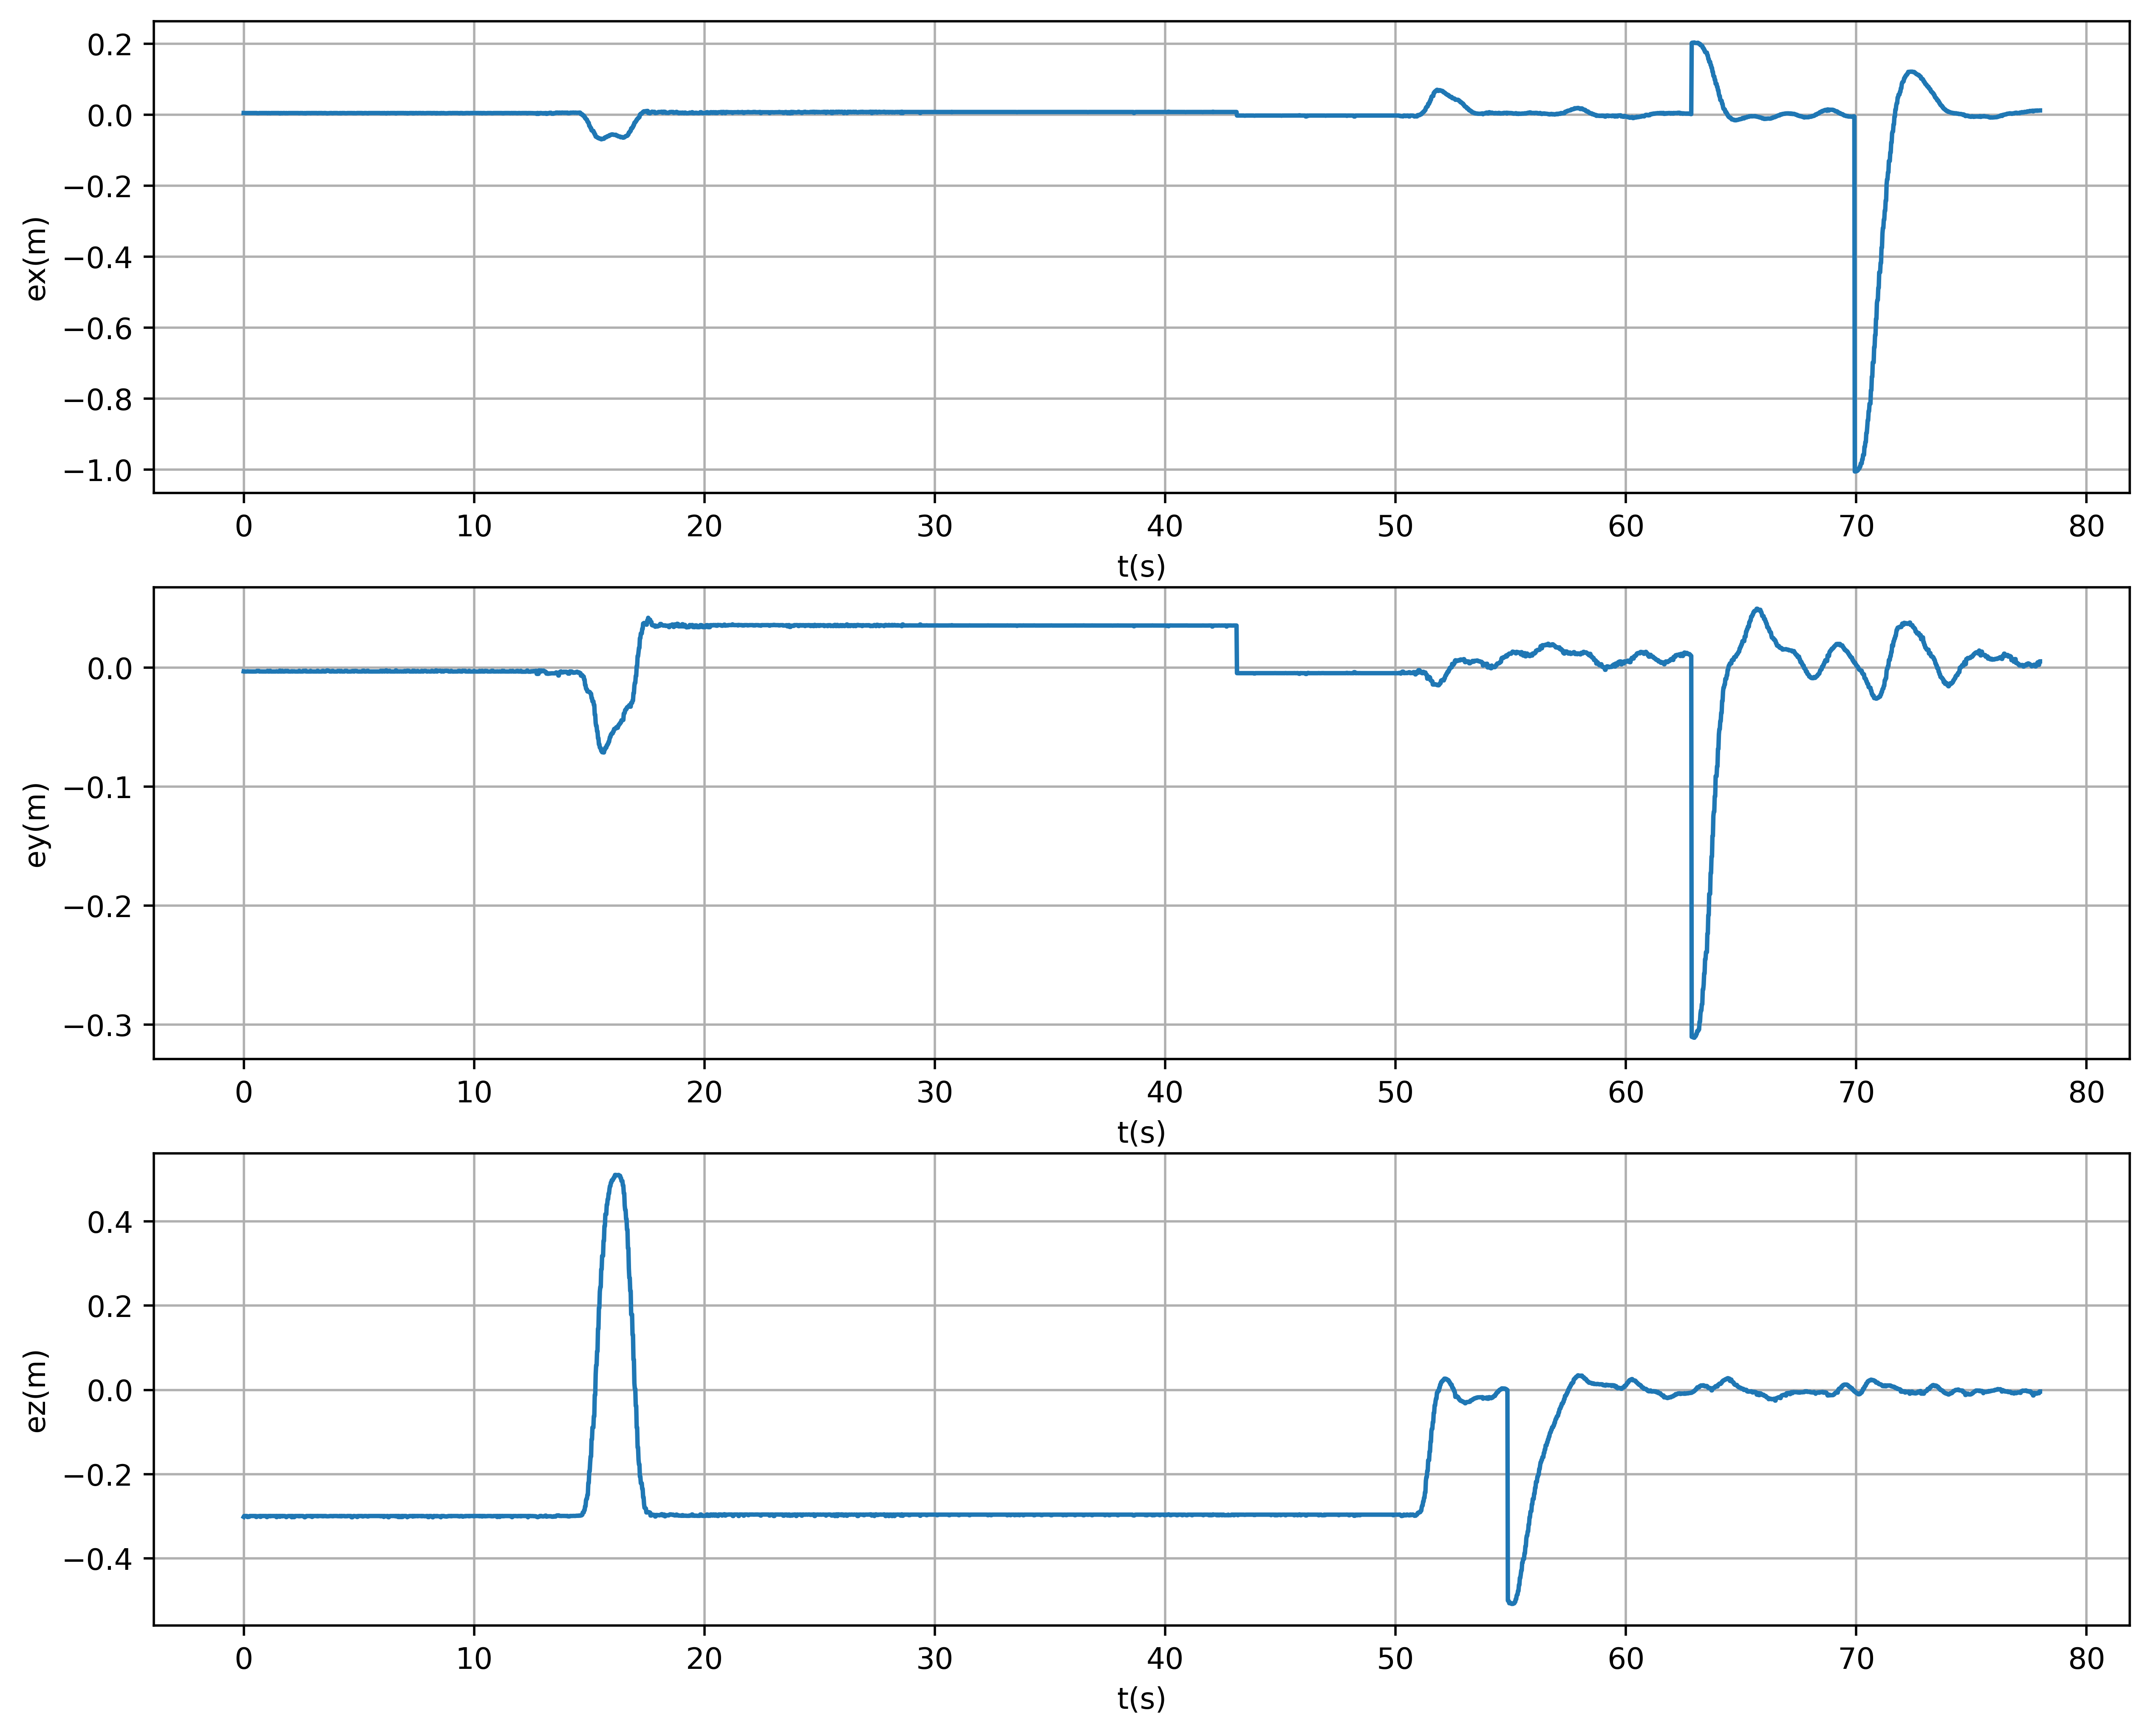

In [12]:
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["position_error.x"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('ex(m)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["position_error.y"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('ey(m)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]["position_error.z"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('ez(m)')
plt.xlabel('t(s)')

Text(0.5, 0, 't(s)')

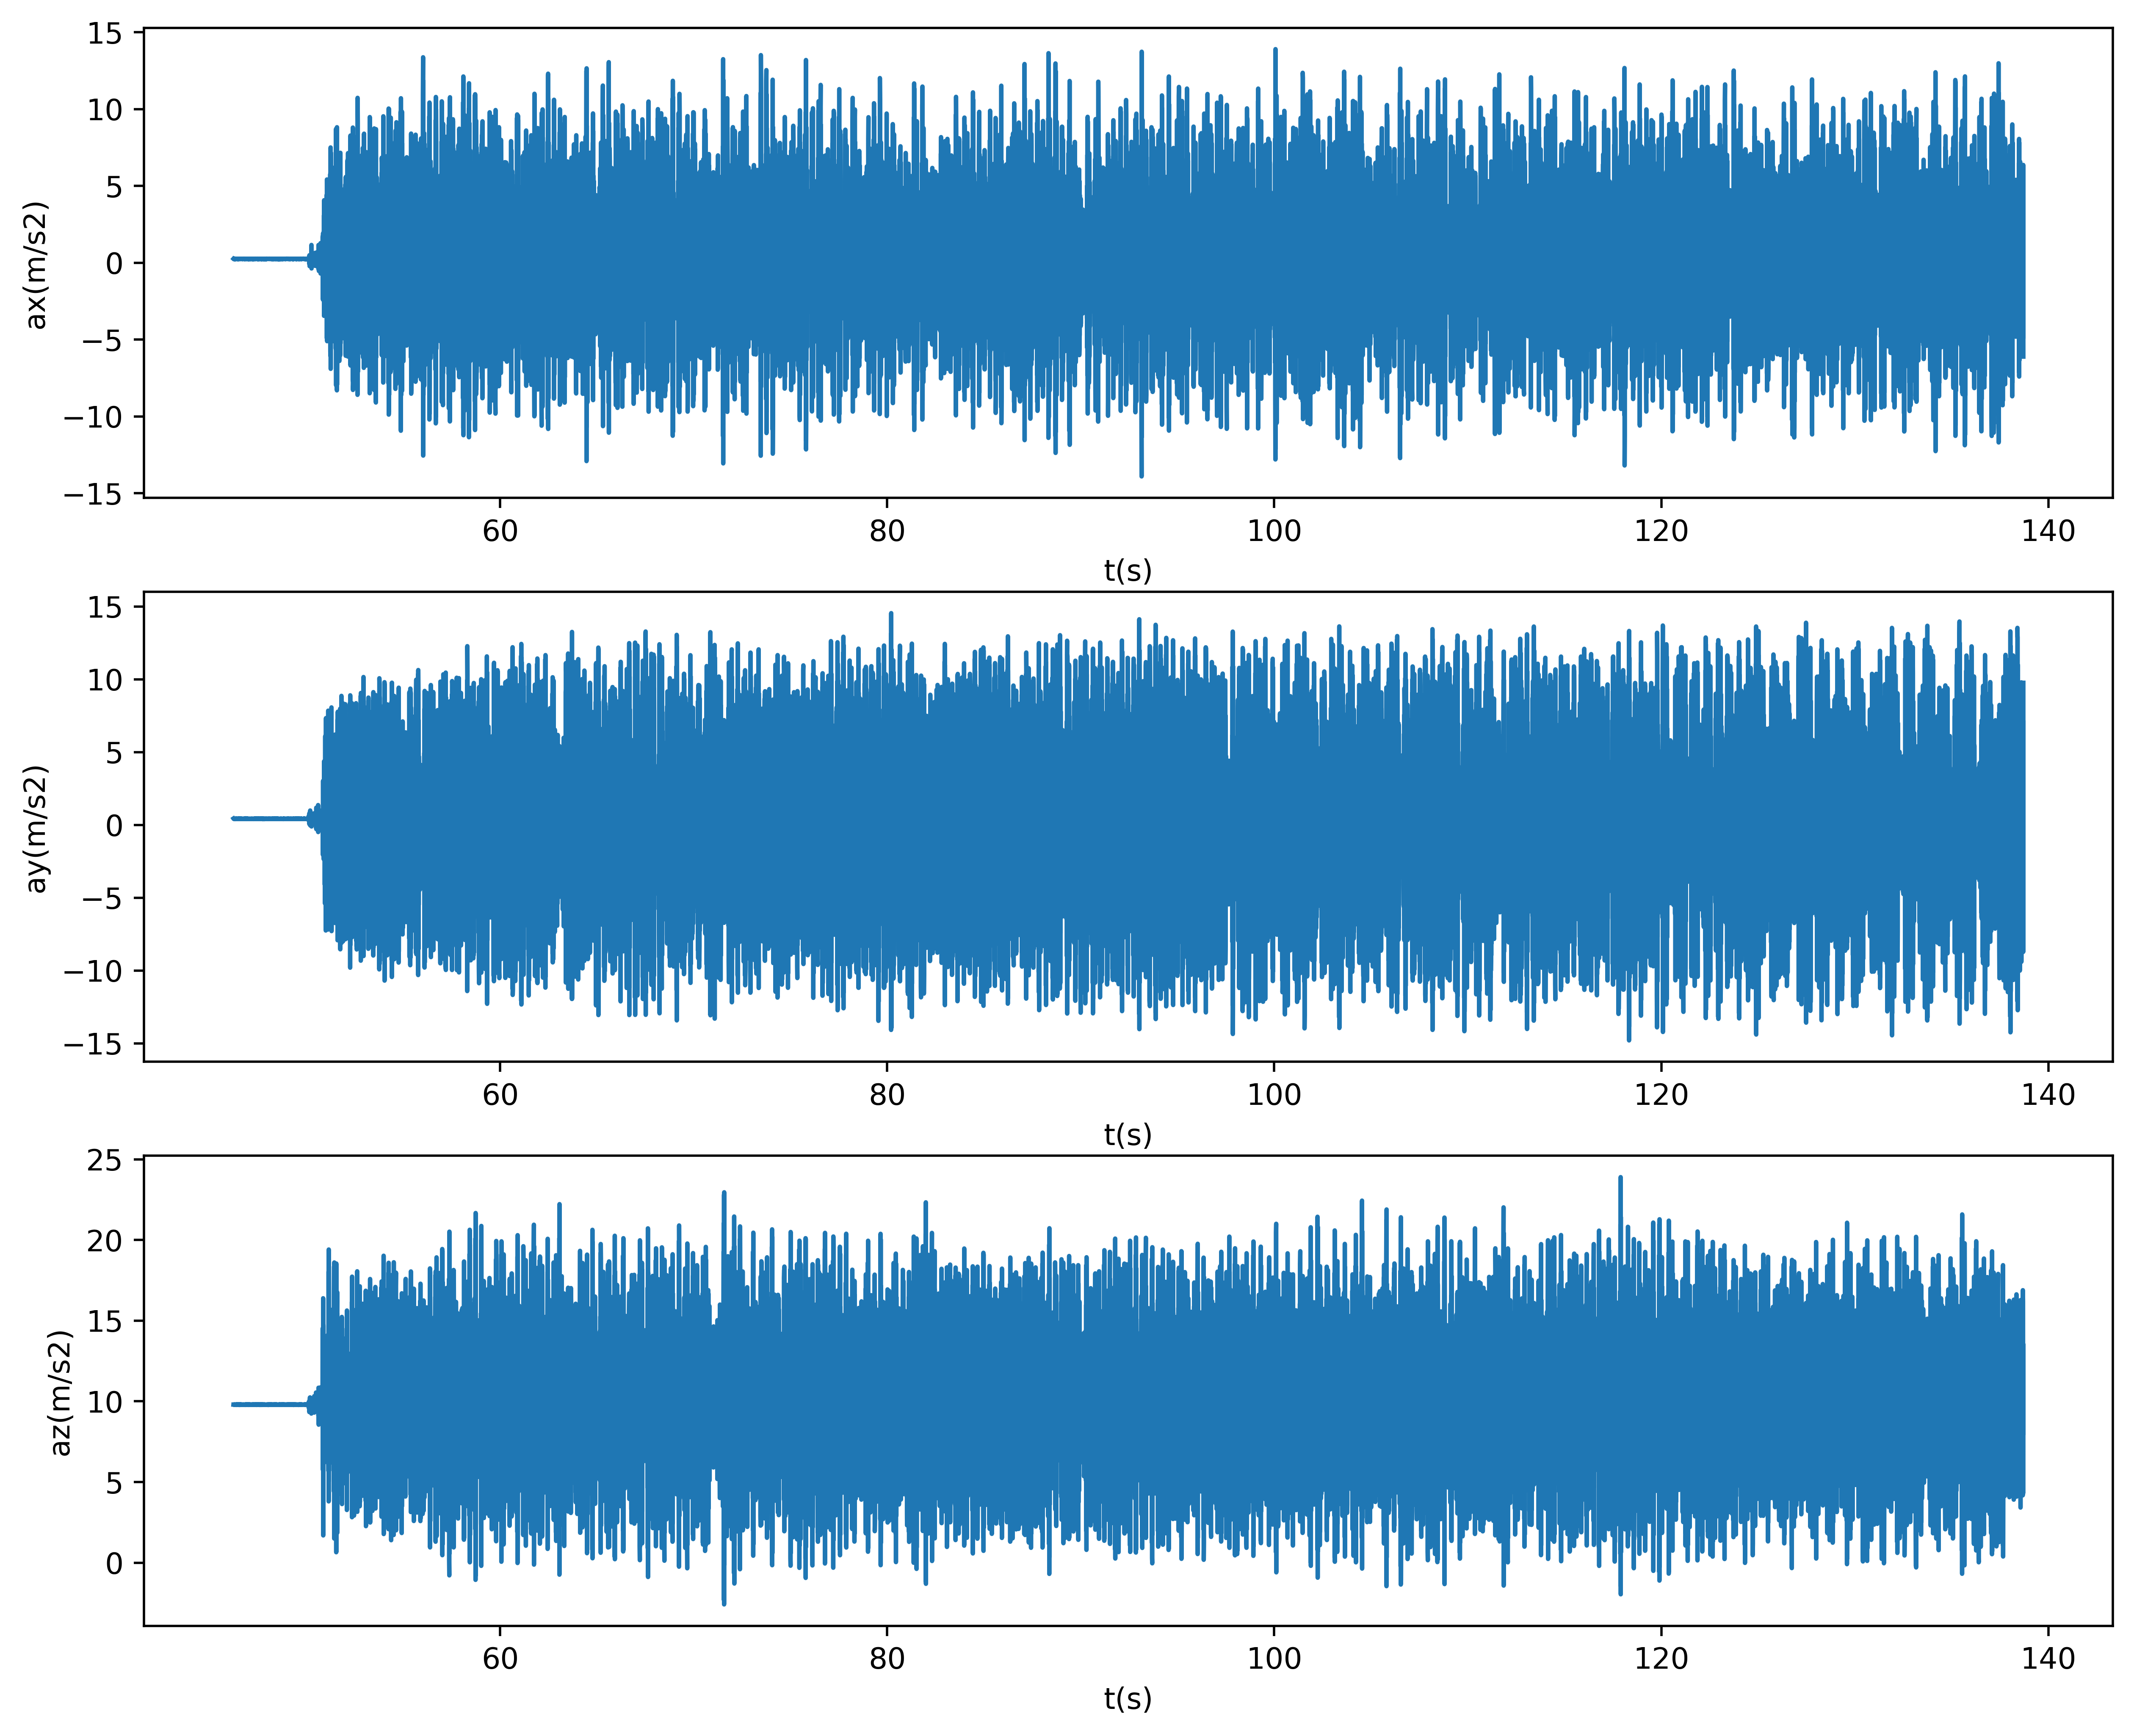

In [13]:
startIdx = 8000
endIdx = 24000

plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.x"][startIdx:endIdx])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.y"][startIdx:endIdx])
plt.ylabel('ay(m/s2)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.z"][startIdx:endIdx])
plt.ylabel('az(m/s2)')
plt.xlabel('t(s)')
